# 응용통계학
> midterm

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Applied Statistics]

In [1]:
#hide
options(jupyter.plot_scale=4)
options(repr.plot.width=8,repr.plot.height=6,repr.plot.res=300)
#options(jupyter.rich_display=FALSE)
#options(max.print=1000)

https://archive.ics.uci.edu/ml/datasets.php?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table


위에서 데이터를 하나 선정하여 

1. 문제를 세팅 (반응변수 및 설명변수 등)

2. 모형 적합 

3. 모형 해석 및 추론

4. 모형 진단

5. 각 회귀계수에 대한 95% 신뢰구간을 Bootstrap에 근거하여 구성하고 이를 이론적인 결과에 의해 산출되는 신뢰구간과 비교한 후 비슷하게 도출되는지 확인할 것. 비슷하다면 왜인지, 차이가 있다면 어떤 이유로 판단되는지 등을 기술,

 

- 데이터는 꼭 위 링크에서 선정하지 않고 다른 데이터를 사용하여도 무방함

- R 뿐 아니라 다른 tool을 이용하여도 무방함.

- 분석과정 및 결과/해석 등을 문서로 정리하여 제출 (소스코드 포함) 

In [2]:
energydata<-read.csv("energydata_complete.csv",header=TRUE)
str(energydata)

'data.frame':	19735 obs. of  29 variables:
 $ date       : chr  "2016-01-11 17:00:00" "2016-01-11 17:10:00" "2016-01-11 17:20:00" "2016-01-11 17:30:00" ...
 $ Appliances : int  60 60 50 50 60 50 60 60 60 70 ...
 $ lights     : int  30 30 30 40 40 40 50 50 40 40 ...
 $ T1         : num  19.9 19.9 19.9 19.9 19.9 ...
 $ RH_1       : num  47.6 46.7 46.3 46.1 46.3 ...
 $ T2         : num  19.2 19.2 19.2 19.2 19.2 ...
 $ RH_2       : num  44.8 44.7 44.6 44.6 44.5 ...
 $ T3         : num  19.8 19.8 19.8 19.8 19.8 ...
 $ RH_3       : num  44.7 44.8 44.9 45 45 ...
 $ T4         : num  19 19 18.9 18.9 18.9 ...
 $ RH_4       : num  45.6 46 45.9 45.7 45.5 ...
 $ T5         : num  17.2 17.2 17.2 17.2 17.2 ...
 $ RH_5       : num  55.2 55.2 55.1 55.1 55.1 ...
 $ T6         : num  7.03 6.83 6.56 6.43 6.37 ...
 $ RH_6       : num  84.3 84.1 83.2 83.4 84.9 ...
 $ T7         : num  17.2 17.2 17.2 17.1 17.2 ...
 $ RH_7       : num  41.6 41.6 41.4 41.3 41.2 ...
 $ T8         : num  18.2 18.2 18.2 18.1 18.

설명 변수
- T1: temporature in kitchen area
- RH_1 : humidity in kitchen area
- T2 : temporature in living room area
- RH_2 : humidity in living room area
- T3: temporature in laundry room area
- RH_3 : humidity in laundry room area
- T4 : temporature in office room area
- RH_4 : humidity in office room area
- T5: temporature in bathroom
- RH_5 : humidity in bathroom
- T6 : temporature outside the building
- RH_6 : humidity outside the building
- T7: temporature in ironing room
- RH_7 : humidity in ironing room
- T8 : temporature in teenager room 2
- RH_8 : humidity in teenager room 2
- T9 : temporature in parents room
- RH_9 : humidity in parents room
- T_out : temperature outside
- Press_mm_bg : pressure
- RH_out : humidity outside
- Windspeed : wind speed
- Visibility : visibility
- Tdewpoint : Tdewpoint
- rv1 : random variable 1
- rv2 : random variable 2
- Date : Date and time format

반응변수
- Appliances : Energy used by appliances

First floor

![](https://ars.els-cdn.com/content/image/1-s2.0-S0378778816308970-gr5.jpg)

Second floor

![](https://ars.els-cdn.com/content/image/1-s2.0-S0378778816308970-gr6.jpg)

구별 변수
- 온도 "T1","T2","T3","T4","T5","T6","T7","T8","T9"
- 습도 "RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"
- 날씨 "T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"
- 빛 "lights"
- 랜덤 "rv1", "rv2"

In [3]:
summary(energydata[,c("T1","T2","T3","T4","T5","T6","T7","T8","T9")])

       T1              T2              T3              T4       
 Min.   :16.79   Min.   :16.10   Min.   :17.20   Min.   :15.10  
 1st Qu.:20.76   1st Qu.:18.79   1st Qu.:20.79   1st Qu.:19.53  
 Median :21.60   Median :20.00   Median :22.10   Median :20.67  
 Mean   :21.69   Mean   :20.34   Mean   :22.27   Mean   :20.86  
 3rd Qu.:22.60   3rd Qu.:21.50   3rd Qu.:23.29   3rd Qu.:22.10  
 Max.   :26.26   Max.   :29.86   Max.   :29.24   Max.   :26.20  
       T5              T6               T7              T8       
 Min.   :15.33   Min.   :-6.065   Min.   :15.39   Min.   :16.31  
 1st Qu.:18.28   1st Qu.: 3.627   1st Qu.:18.70   1st Qu.:20.79  
 Median :19.39   Median : 7.300   Median :20.03   Median :22.10  
 Mean   :19.59   Mean   : 7.911   Mean   :20.27   Mean   :22.03  
 3rd Qu.:20.62   3rd Qu.:11.256   3rd Qu.:21.60   3rd Qu.:23.39  
 Max.   :25.80   Max.   :28.290   Max.   :26.00   Max.   :27.23  
       T9       
 Min.   :14.89  
 1st Qu.:18.00  
 Median :19.39  
 Mean   :19.49 

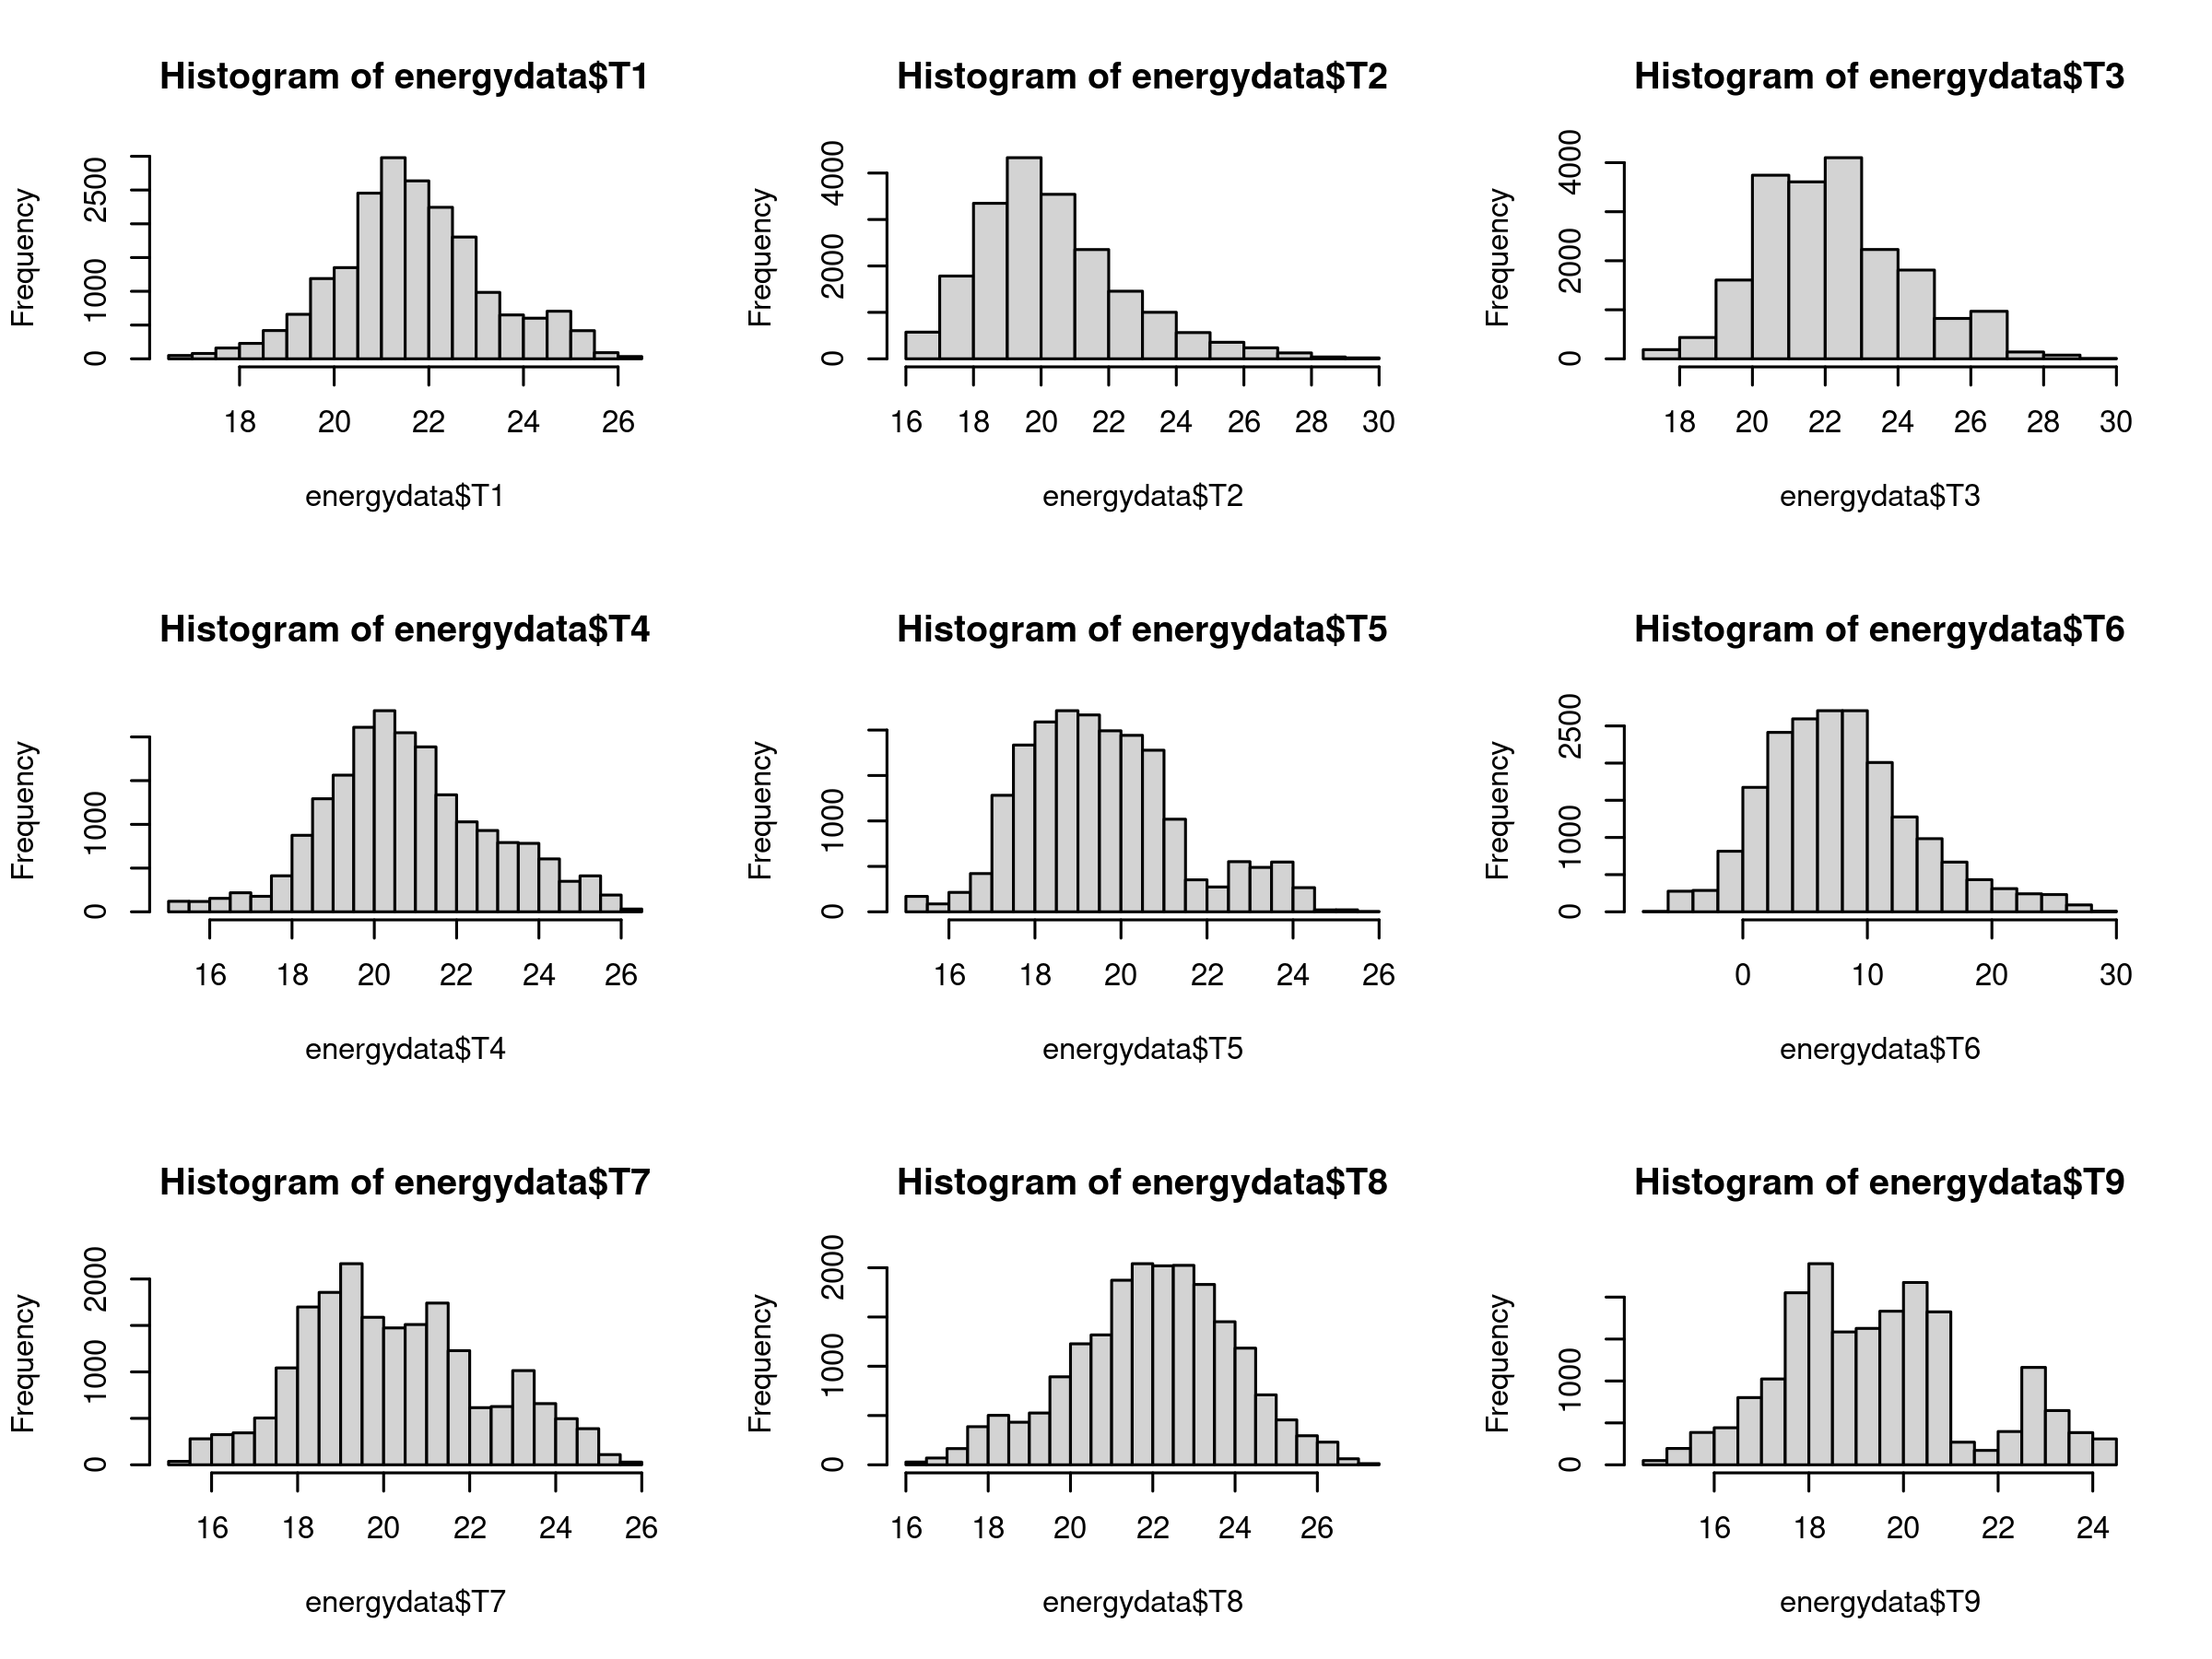

In [4]:
par(mfrow=c(3,3))
hist(energydata$T1)
hist(energydata$T2)
hist(energydata$T3)
hist(energydata$T4)
hist(energydata$T5)
hist(energydata$T6)
hist(energydata$T7)
hist(energydata$T8)
hist(energydata$T9)

온도 데이터 분석, 
- T6 이 낮은 이유는 밖에 있는 센서이기 때문이다.
- T9를 제외하고 모든 값들의 분포는 정규분포를 따르는 종모양을 띄고 있는 것 같다.

In [5]:
summary(energydata[,c("RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9")])

      RH_1            RH_2            RH_3            RH_4      
 Min.   :27.02   Min.   :20.46   Min.   :28.77   Min.   :27.66  
 1st Qu.:37.33   1st Qu.:37.90   1st Qu.:36.90   1st Qu.:35.53  
 Median :39.66   Median :40.50   Median :38.53   Median :38.40  
 Mean   :40.26   Mean   :40.42   Mean   :39.24   Mean   :39.03  
 3rd Qu.:43.07   3rd Qu.:43.26   3rd Qu.:41.76   3rd Qu.:42.16  
 Max.   :63.36   Max.   :56.03   Max.   :50.16   Max.   :51.09  
      RH_5            RH_6            RH_7            RH_8      
 Min.   :29.82   Min.   : 1.00   Min.   :23.20   Min.   :29.60  
 1st Qu.:45.40   1st Qu.:30.02   1st Qu.:31.50   1st Qu.:39.07  
 Median :49.09   Median :55.29   Median :34.86   Median :42.38  
 Mean   :50.95   Mean   :54.61   Mean   :35.39   Mean   :42.94  
 3rd Qu.:53.66   3rd Qu.:83.23   3rd Qu.:39.00   3rd Qu.:46.54  
 Max.   :96.32   Max.   :99.90   Max.   :51.40   Max.   :58.78  
      RH_9      
 Min.   :29.17  
 1st Qu.:38.50  
 Median :40.90  
 Mean   :41.55  
 3rd 

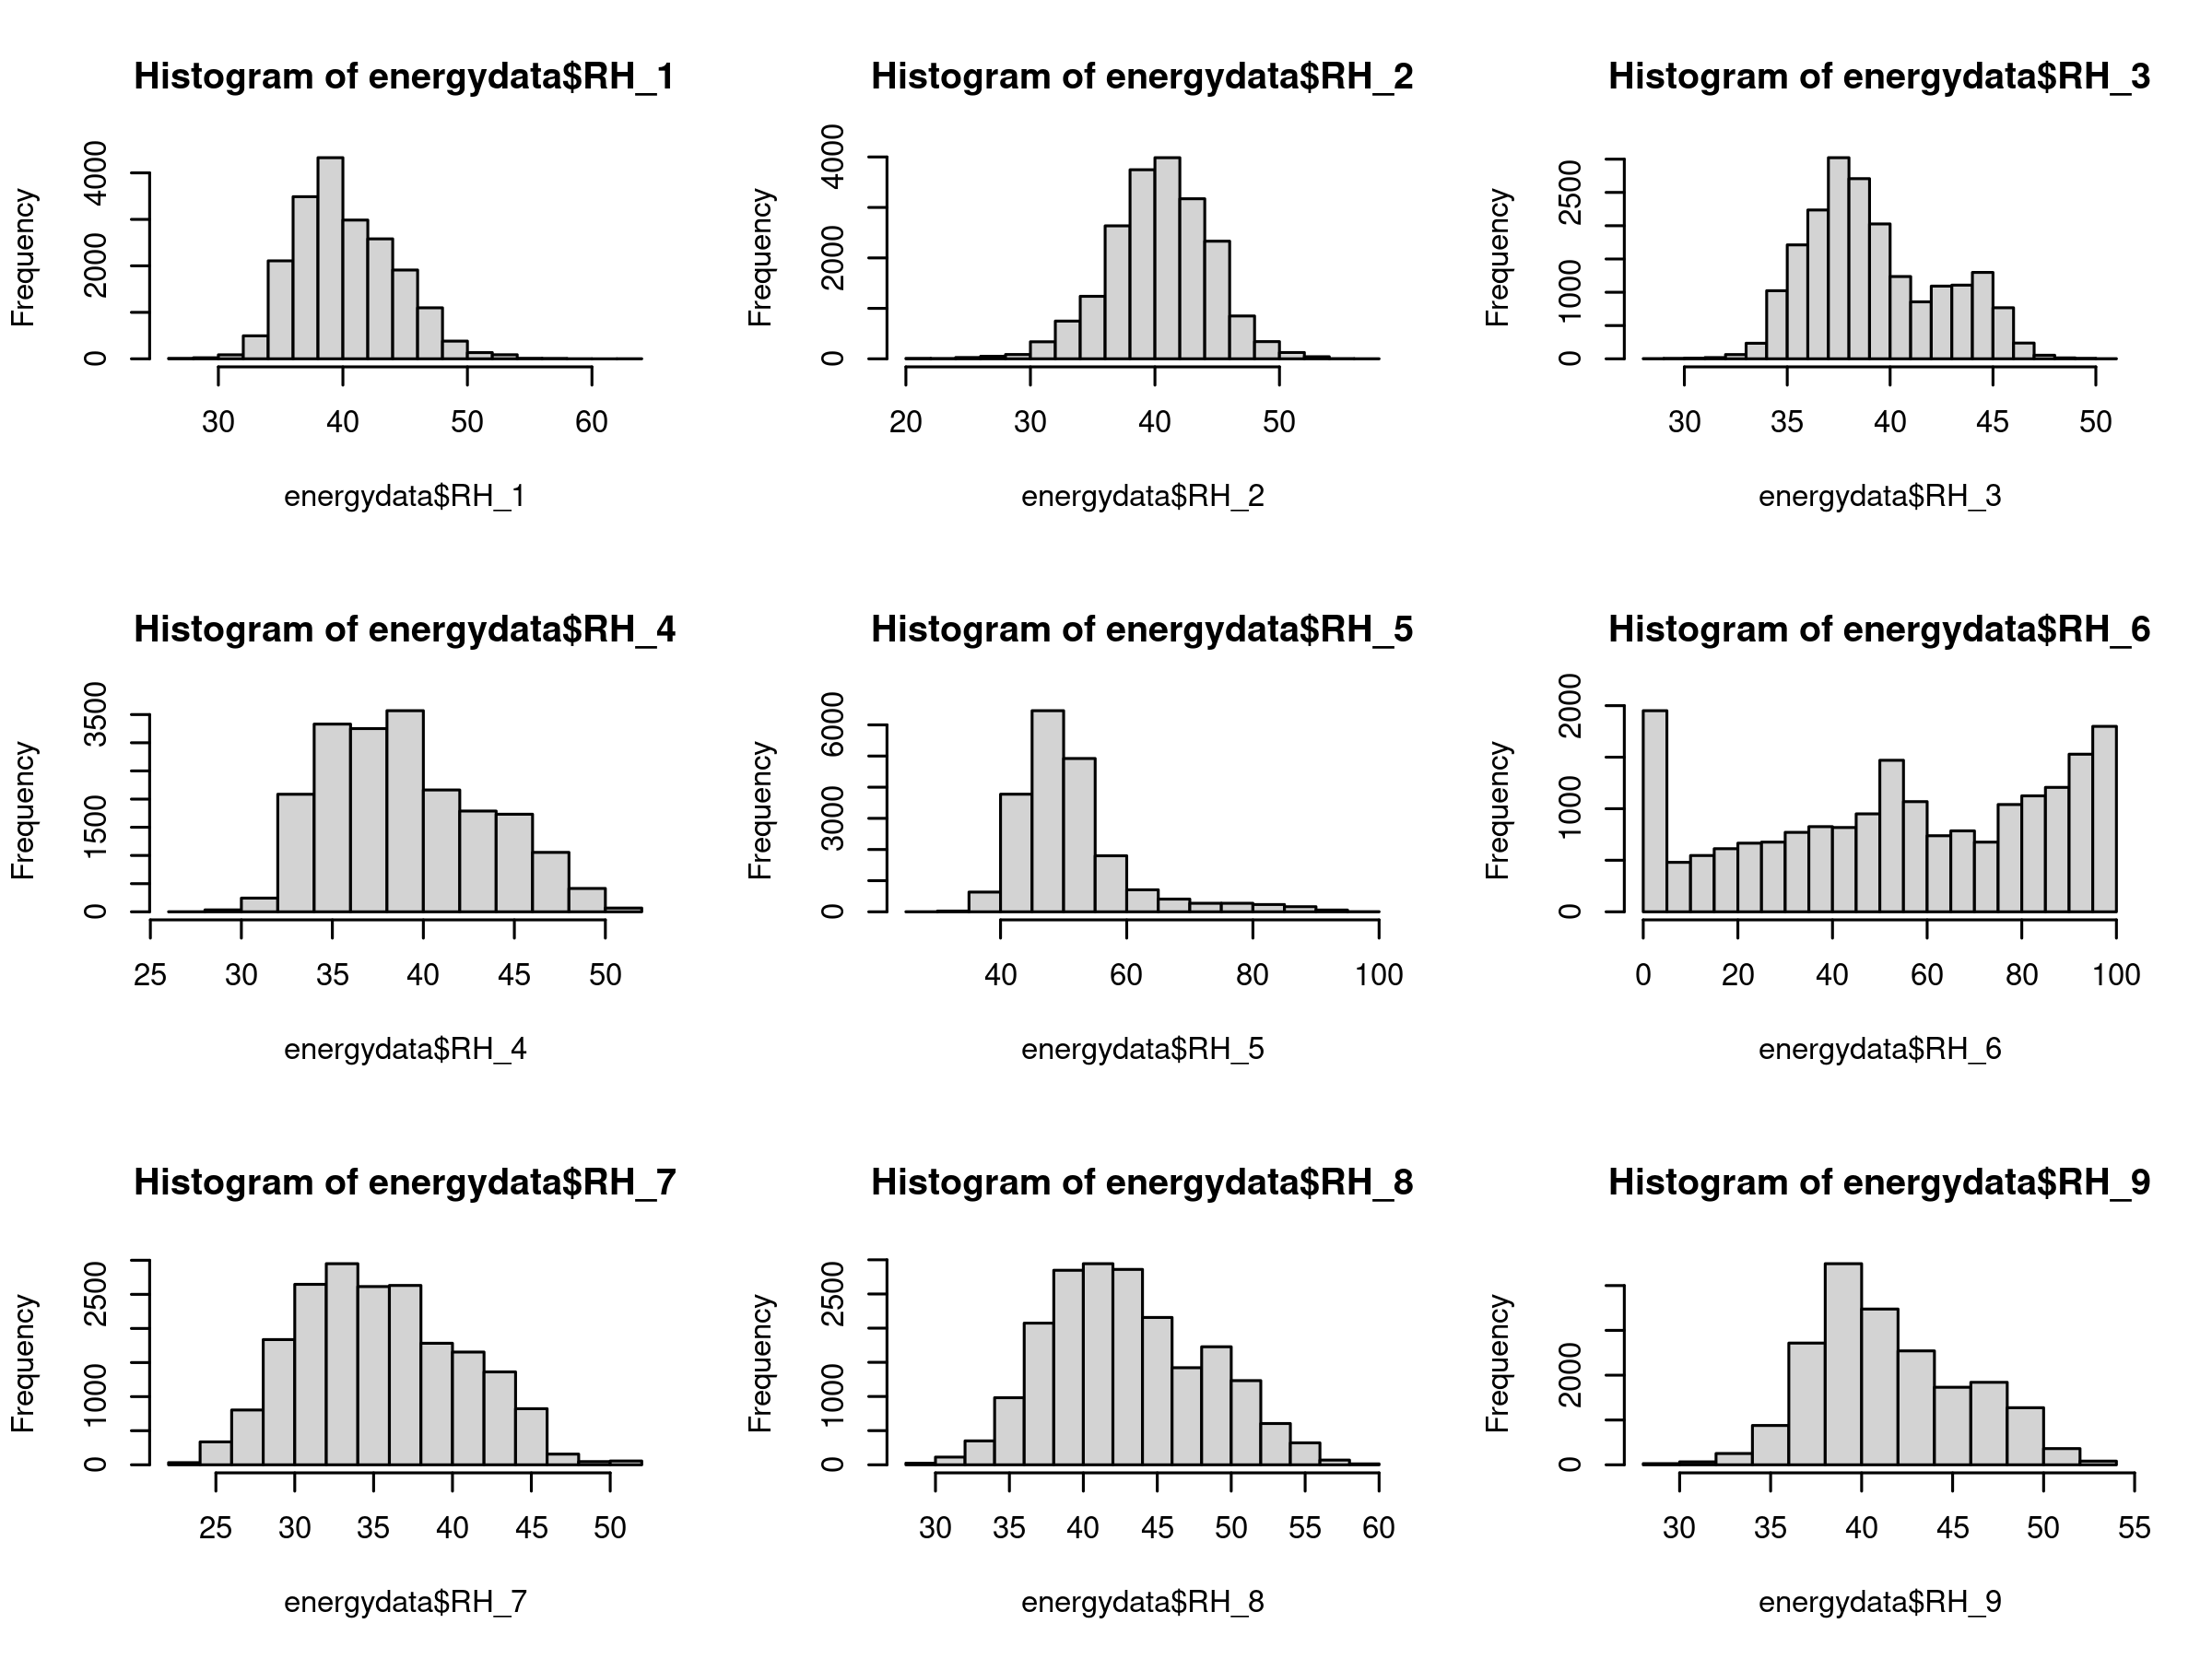

In [6]:
par(mfrow=c(3,3))
hist(energydata$RH_1)
hist(energydata$RH_2)
hist(energydata$RH_3)
hist(energydata$RH_4)
hist(energydata$RH_5)
hist(energydata$RH_6)
hist(energydata$RH_7)
hist(energydata$RH_8)
hist(energydata$RH_9)

습도 데이터 분석
- RH_6 을 제외한 모든 습도 값은 정규 분포를 따른다.
- RH_6 센서만 외부에 있는 센서이다. 즉 내부의 센서들의 습도의 분포는 모두 정규분포를 따른다.

In [7]:
summary(energydata[,c("T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility")])

     T_out          Tdewpoint          RH_out        Press_mm_hg   
 Min.   :-5.000   Min.   :-6.600   Min.   : 24.00   Min.   :729.3  
 1st Qu.: 3.667   1st Qu.: 0.900   1st Qu.: 70.33   1st Qu.:750.9  
 Median : 6.917   Median : 3.433   Median : 83.67   Median :756.1  
 Mean   : 7.412   Mean   : 3.761   Mean   : 79.75   Mean   :755.5  
 3rd Qu.:10.408   3rd Qu.: 6.567   3rd Qu.: 91.67   3rd Qu.:760.9  
 Max.   :26.100   Max.   :15.500   Max.   :100.00   Max.   :772.3  
   Windspeed        Visibility   
 Min.   : 0.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.:29.00  
 Median : 3.667   Median :40.00  
 Mean   : 4.040   Mean   :38.33  
 3rd Qu.: 5.500   3rd Qu.:40.00  
 Max.   :14.000   Max.   :66.00  

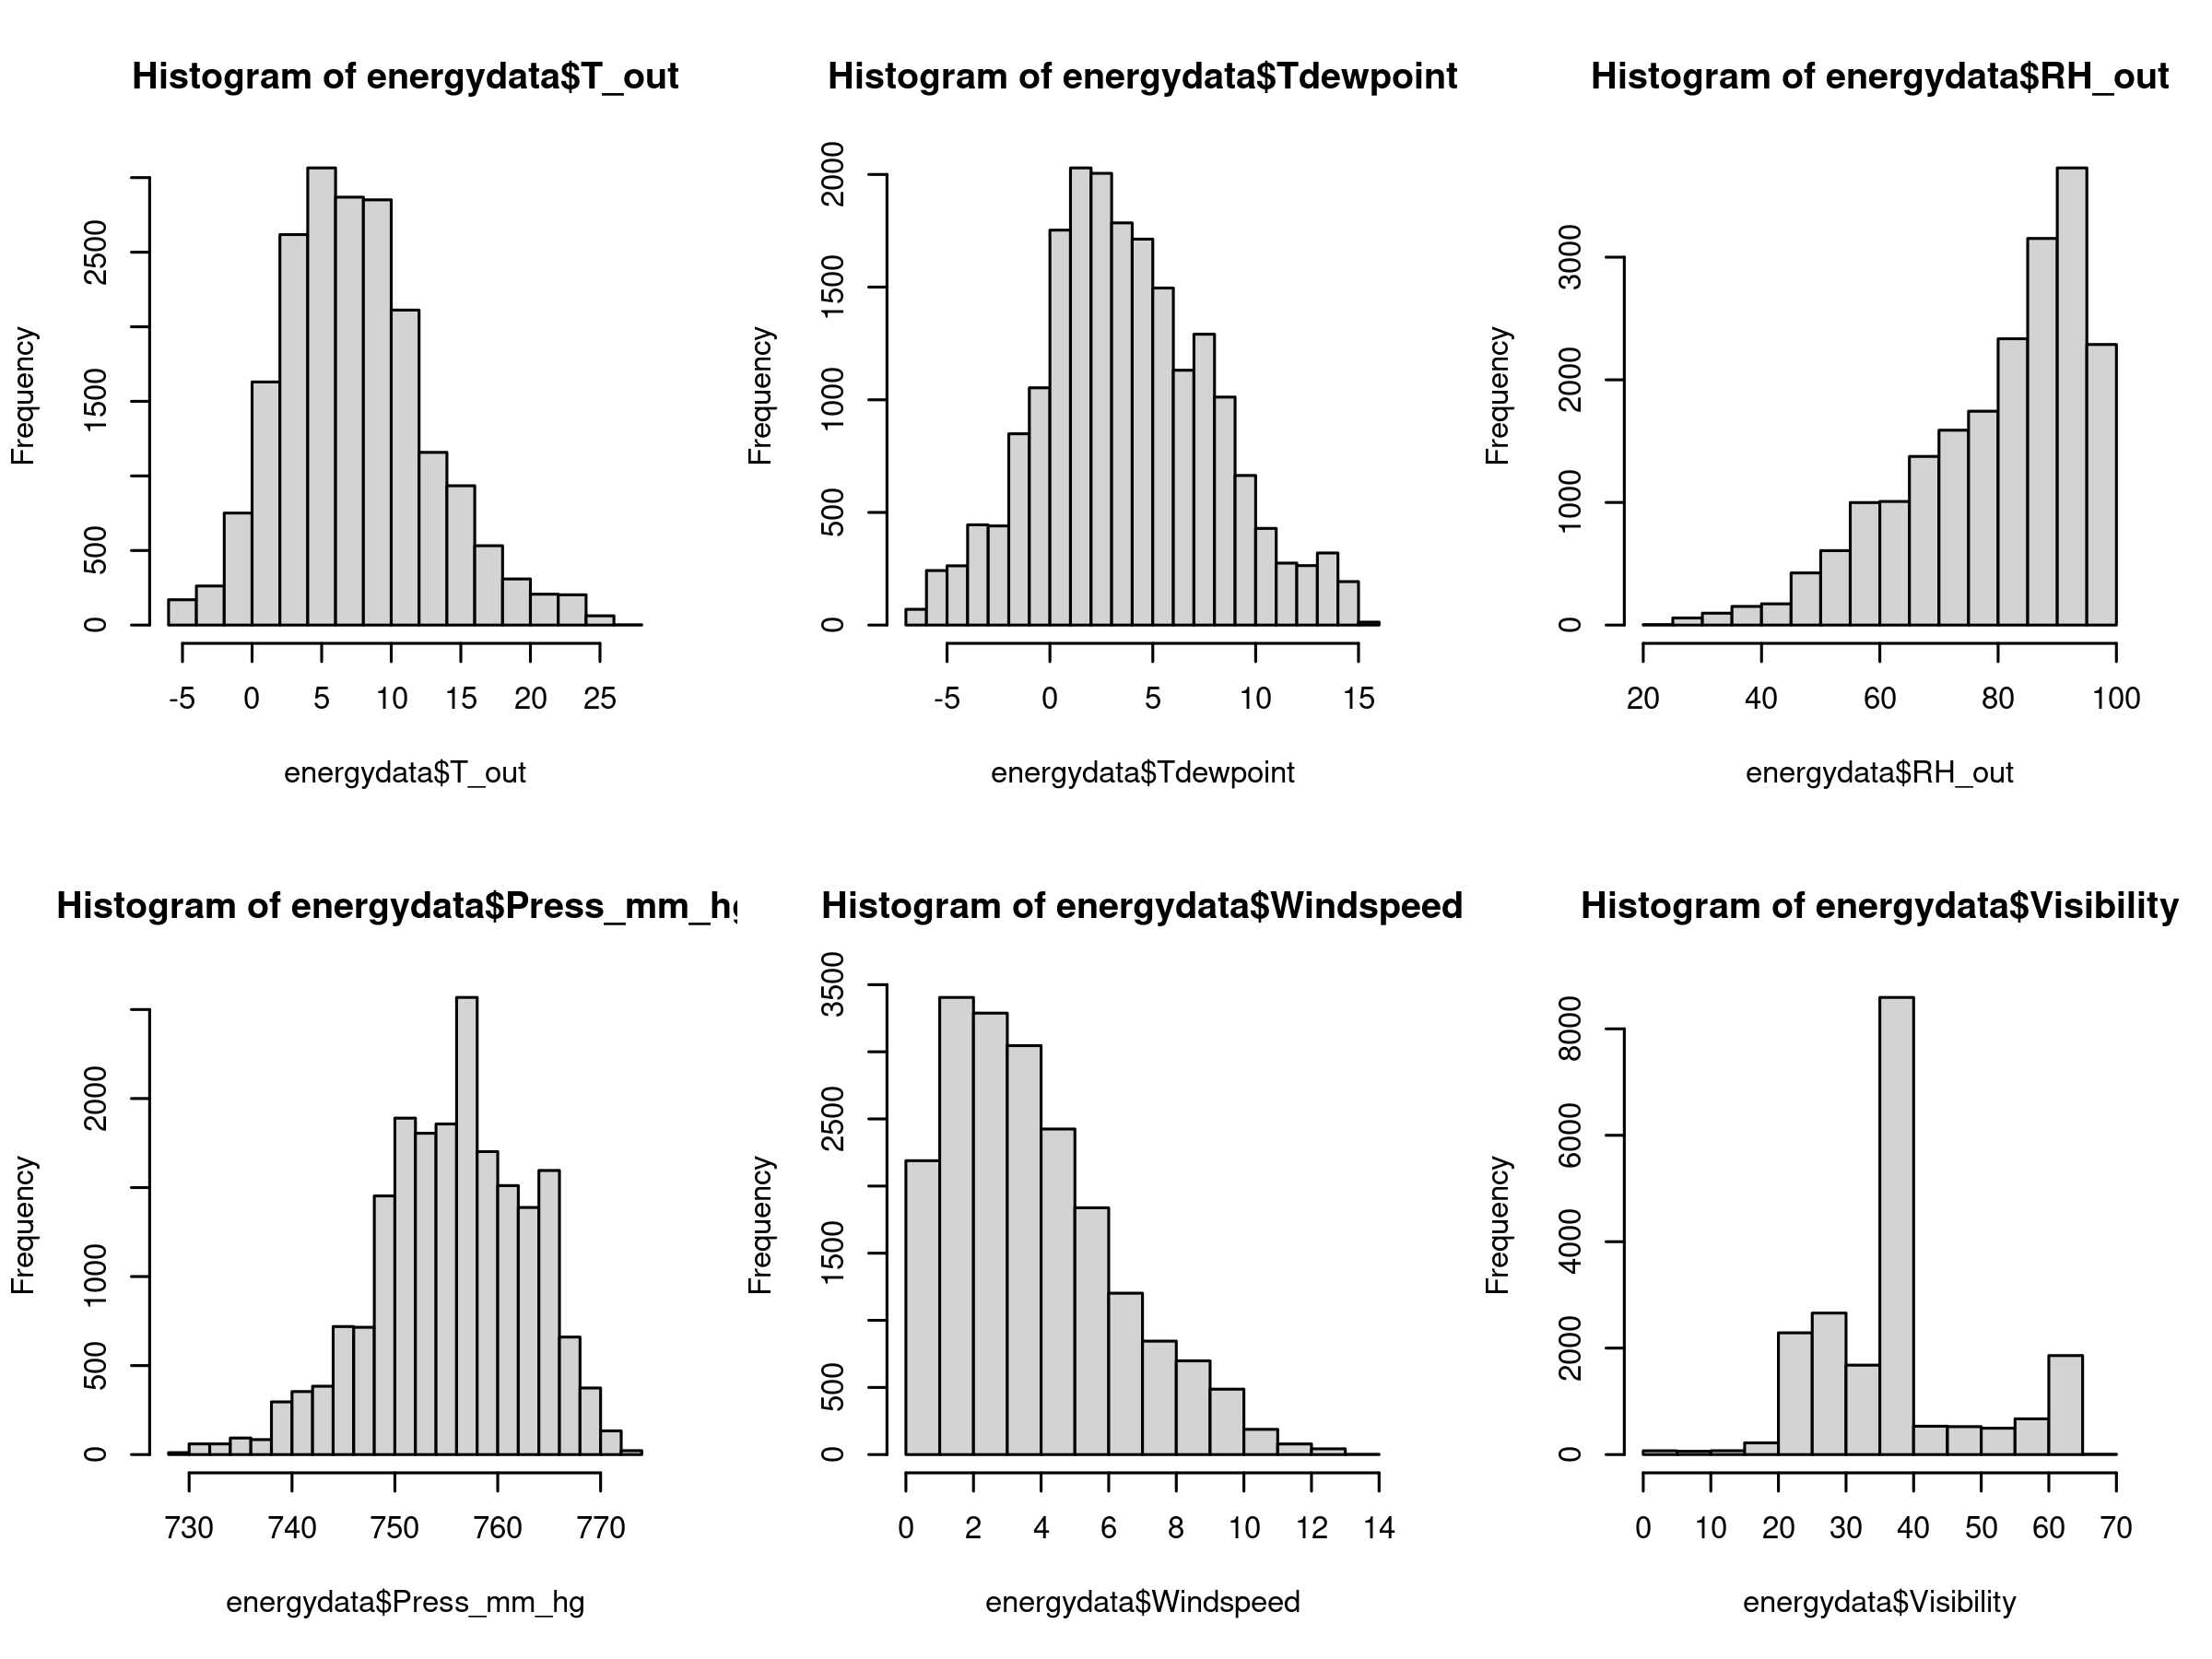

In [8]:
par(mfrow=c(2,3))
hist(energydata$T_out)
hist(energydata$Tdewpoint)
hist(energydata$RH_out)
hist(energydata$Press_mm_hg)
hist(energydata$Windspeed)
hist(energydata$Visibility)

- RH_out은 정규분포를 따르지 않는다. 외부에 있는 센서이다.
- 풍속windspeed와 visibility는 치우침이 보인다.

In [9]:
summary(energydata$lights)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.802   0.000  70.000 

In [10]:
table(energydata$lights)


    0    10    20    30    40    50    60    70 
15252  2212  1624   559    77     9     1     1 

빛은 0 값이 많기 때문에 모델의 설명변수 설정이 적절치 않아 보였다.

In [11]:
summary(energydata$Appliances)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.00   50.00   60.00   97.69  100.00 1080.00 

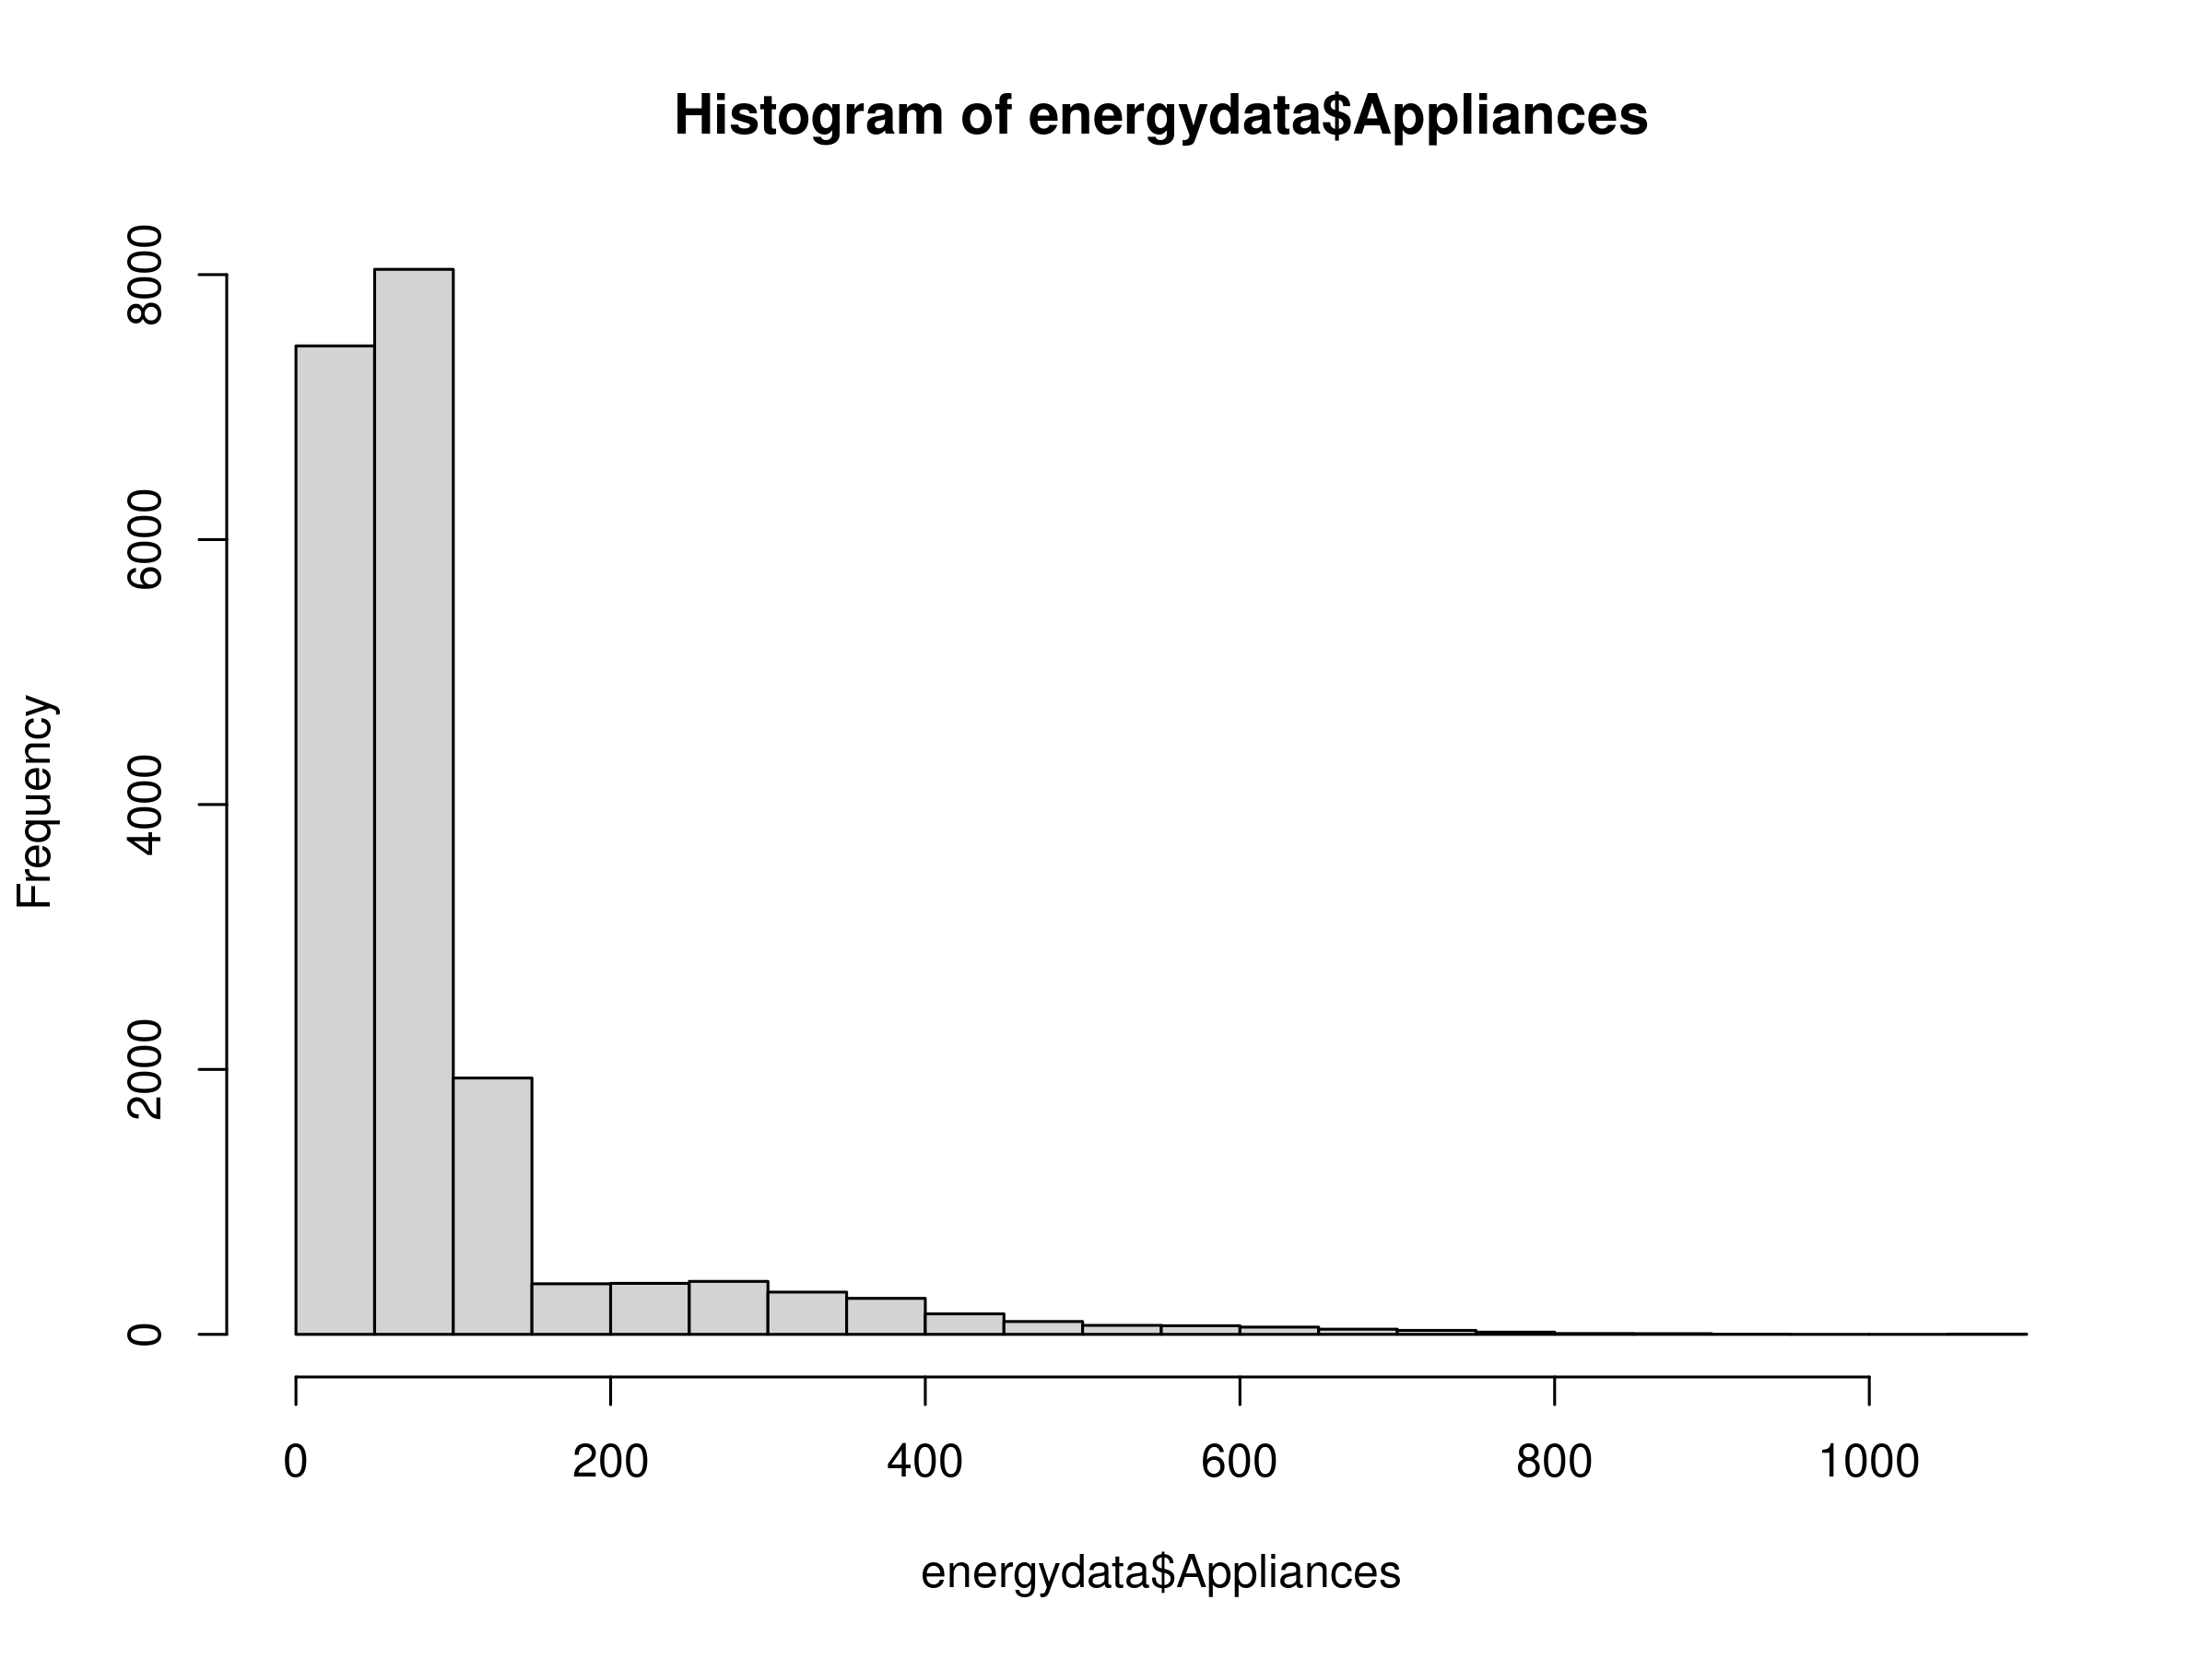

In [12]:
hist(energydata$Appliances)

종속변수로 사용될 appliances 데이터 대부분이 200 아래로 존재하며, 이상치로 최대값인 1080이 있다. 
- 즉, 에너지를 많이 사용하지는 않는 것 같다.
- appliances 변수와 같은 분포를 가지는 독립변수는 없다.

다음으로 상관관계를 기반으로 관찰을 해보고자 했다.

In [13]:
col_name1 = c("T1","T2","T3","T4","T5","T6","T7","T8","T9","T_out")
col_name2 = c("RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","RH_out")
col_name3 = c("Tdewpoint","Press_mm_hg","Windspeed","Visibility")

In [14]:
round(cor(energydata[,col_name1],energydata[,col_name1]),2)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T_out
T1,1.00,0.84,0.89,0.88,0.89,0.65,0.84,0.83,0.84,0.68
T2,0.84,1.00,0.74,0.76,0.72,0.80,0.66,0.58,0.68,0.79
T3,0.89,0.74,1.00,0.85,0.89,0.69,0.85,0.80,0.90,0.70
T4,0.88,0.76,0.85,1.00,0.87,0.65,0.88,0.80,0.89,0.66
T5,0.89,0.72,0.89,0.87,1.00,0.63,0.87,0.82,0.91,0.65
T6,0.65,0.80,0.69,0.65,0.63,1.00,0.62,0.48,0.67,0.97
T7,0.84,0.66,0.85,0.88,0.87,0.62,1.00,0.88,0.94,0.63
T8,0.83,0.58,0.80,0.80,0.82,0.48,0.88,1.00,0.87,0.50
T9,0.84,0.68,0.90,0.89,0.91,0.67,0.94,0.87,1.00,0.67
T_out,0.68,0.79,0.70,0.66,0.65,0.97,0.63,0.50,0.67,1.00


- 온도끼리는 모두 양의 상관관계를 가지고 있었다.
- 특히 T3, T5, T7, T8이 0.9 이상의 값으로 T9과 높은 상관관계를 가지고 있었다.
- T6은 밖에 있는 센서이다보니 외부 온도인 T_out과 상관관계가 높았다.
- 따라서 T6, T9는 상관관계가 높기 때문에 설명변수에서 제거하고 모델을 세울 것이다.

In [15]:
round(cor(energydata[,col_name2],energydata[,col_name2]),2)

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9,RH_out
RH_1,1.00,0.80,0.84,0.88,0.30,0.25,0.80,0.74,0.76,0.27
RH_2,0.80,1.00,0.68,0.72,0.25,0.39,0.69,0.68,0.68,0.58
RH_3,0.84,0.68,1.00,0.90,0.38,0.51,0.83,0.83,0.83,0.36
RH_4,0.88,0.72,0.90,1.00,0.35,0.39,0.89,0.85,0.86,0.34
RH_5,0.30,0.25,0.38,0.35,1.00,0.26,0.33,0.36,0.27,0.19
RH_6,0.25,0.39,0.51,0.39,0.26,1.00,0.36,0.49,0.39,0.72
RH_7,0.80,0.69,0.83,0.89,0.33,0.36,1.00,0.88,0.86,0.38
RH_8,0.74,0.68,0.83,0.85,0.36,0.49,0.88,1.00,0.86,0.49
RH_9,0.76,0.68,0.83,0.86,0.27,0.39,0.86,0.86,1.00,0.36
RH_out,0.27,0.58,0.36,0.34,0.19,0.72,0.38,0.49,0.36,1.00


- 습도의 상관관계를 보아하니 온도만큼 높은 상관관계를 보이는 변수는 없어보였다.

In [16]:
round(cor(energydata[,col_name3],energydata[,col_name3]),2)

,Tdewpoint,Press_mm_hg,Windspeed,Visibility
Tdewpoint,1.00,-0.24,0.13,-0.04
Press_mm_hg,-0.24,1.00,-0.24,0.04
Windspeed,0.13,-0.24,1.00,-0.01
Visibility,-0.04,0.04,-0.01,1.00


- 대부분 상관관계가 낮았다.
- visibility는 상관관계가 너무 낮아 모델을 설명하기 적절치 않다고 판단하여 포함하지 않을 것이다.

모델 적합을 하기 앞서 모든 데이터들의 분포가 다르니, 표준화를 시킨 후에 모델을 적합하고자 한다.

In [17]:
col_name = c("T1","T2","T3","T4","T5","T6","T7","T8","T9","T_out",
               "RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9","RH_out",
               "Tdewpoint","Press_mm_hg","Windspeed","Visibility","Appliances")

In [18]:
energydata_stand = data.frame(scale(energydata[,col_name]))

In [19]:
lmod <- lm(Appliances ~ T1+T2+T3+T4+T5+T7+T8+RH_1+RH_2+RH_3+RH_4+RH_5+RH_6+RH_7+RH_8+RH_9+T_out+Tdewpoint+Press_mm_hg+Windspeed,energydata_stand)

In [20]:
lmod <- lm(Appliances ~ T1+T2+T3+RH_1+RH_2+RH_3,energydata)

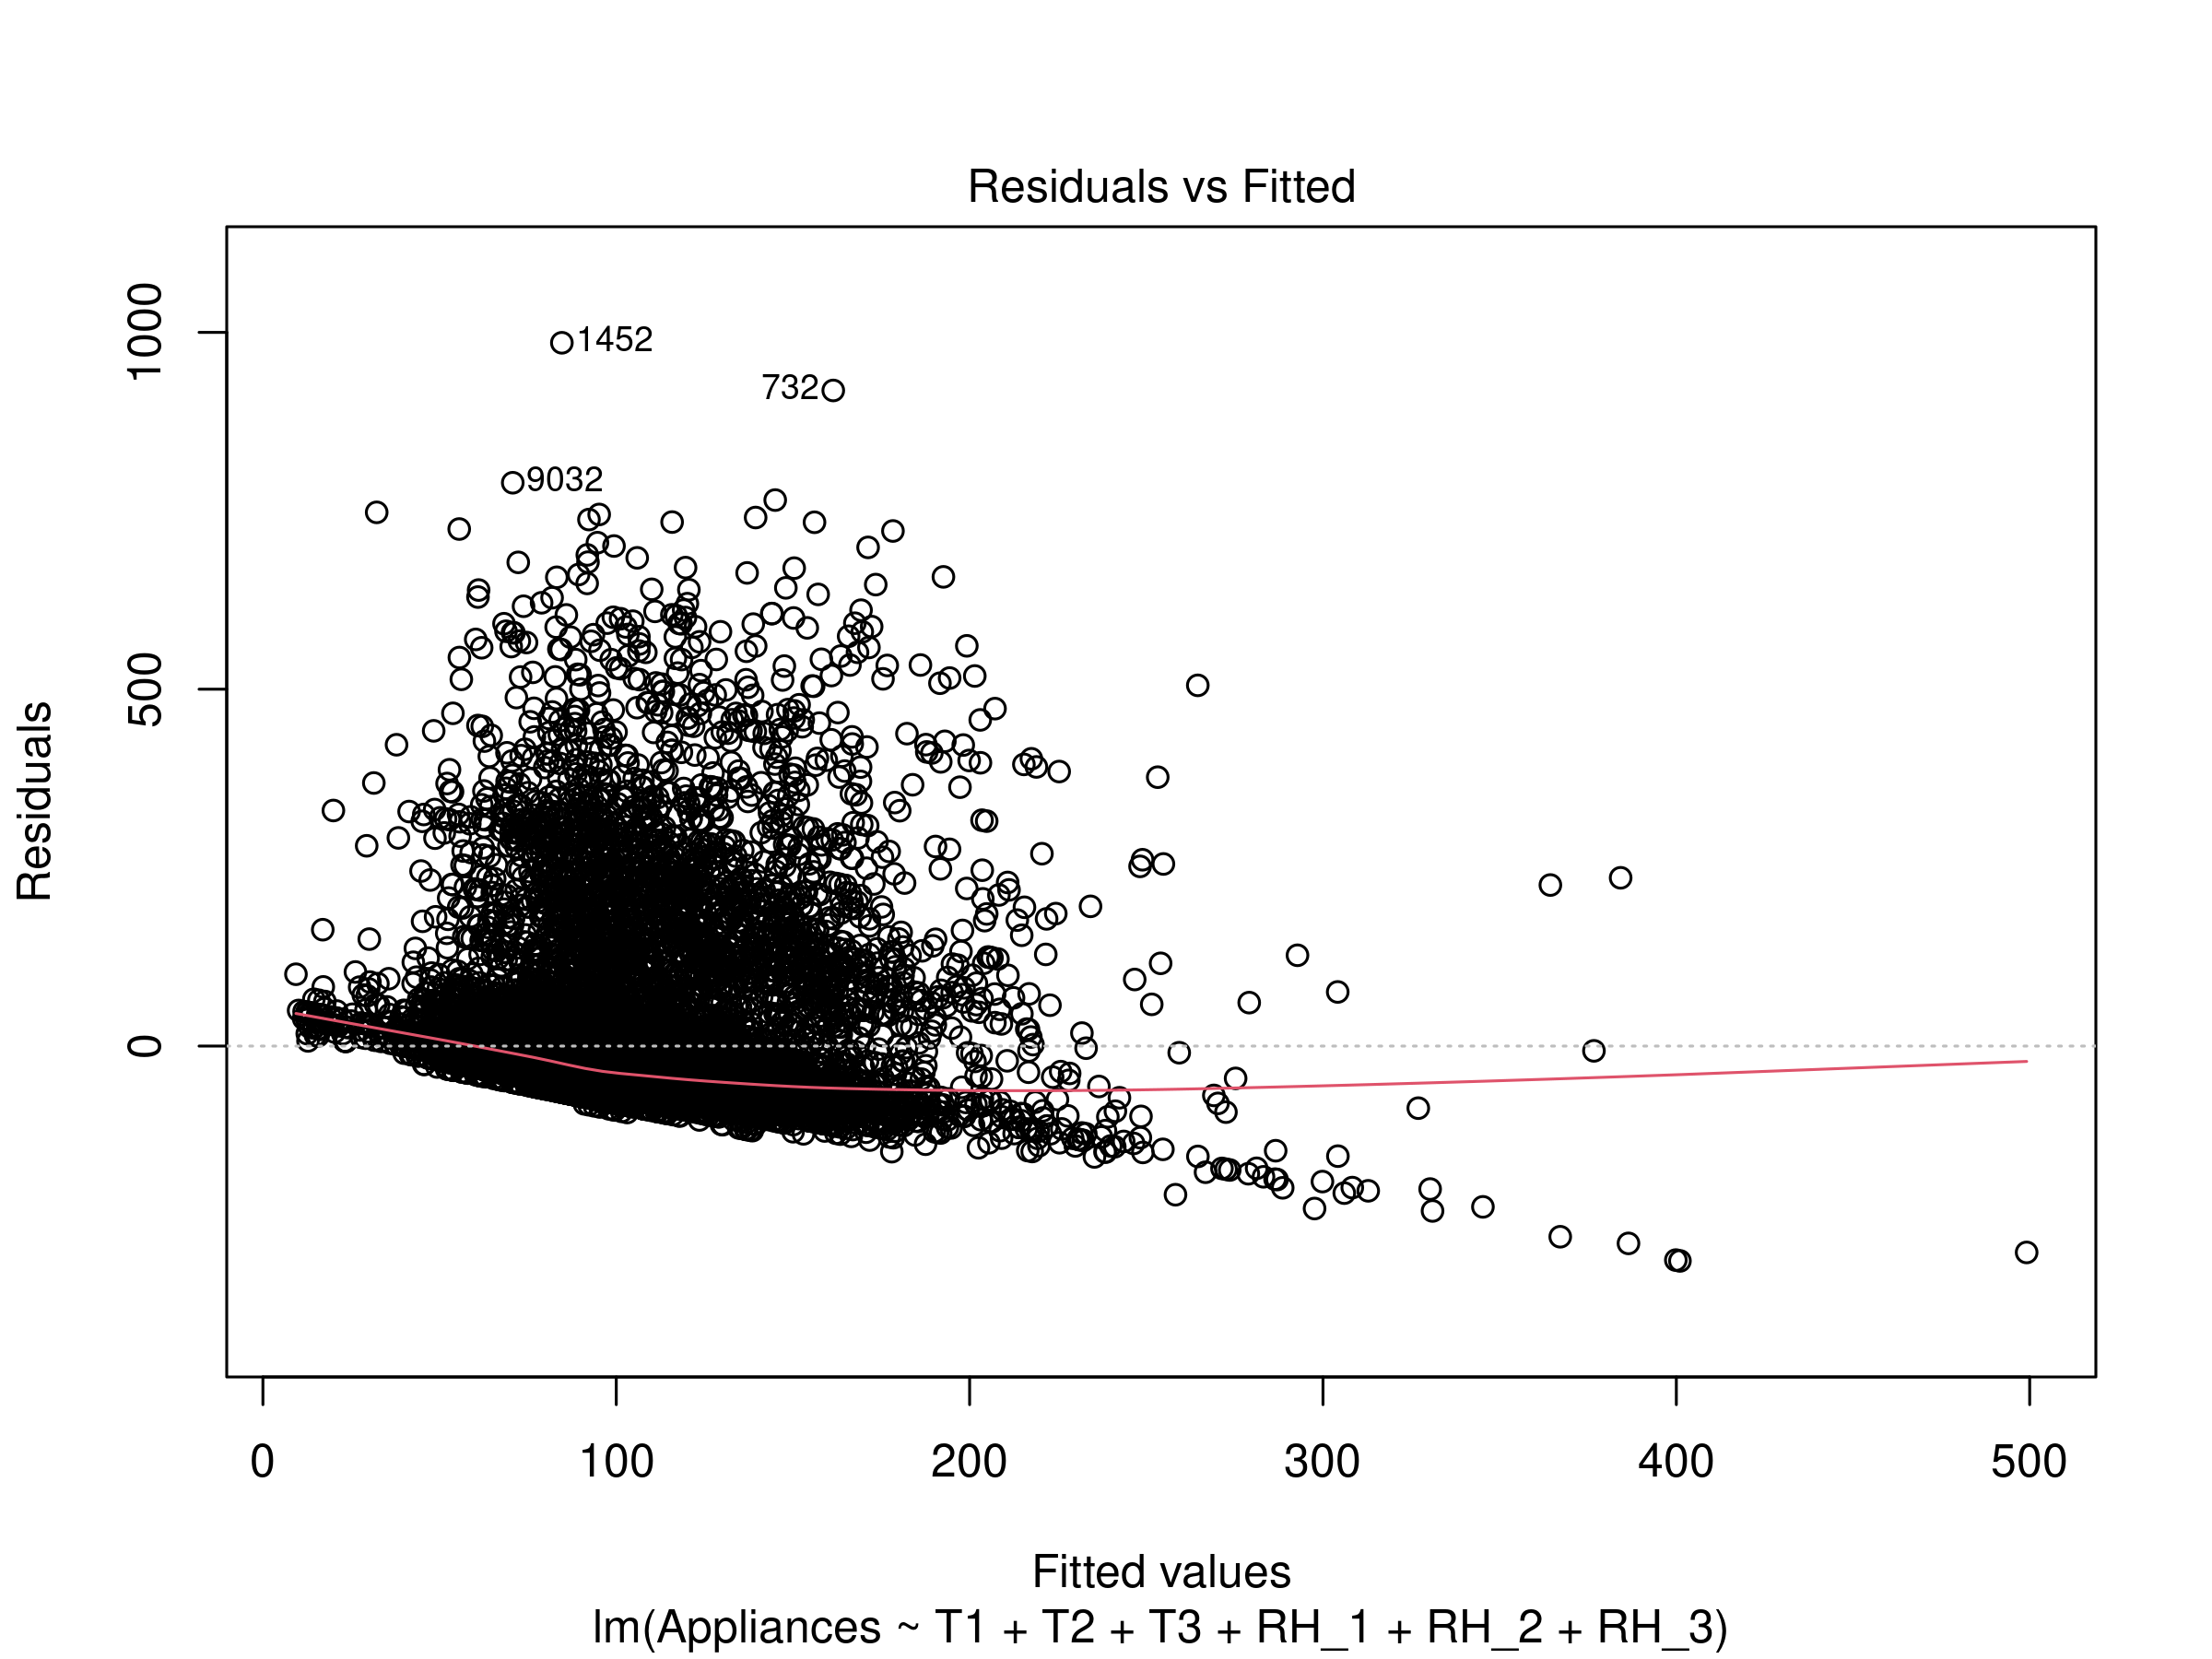

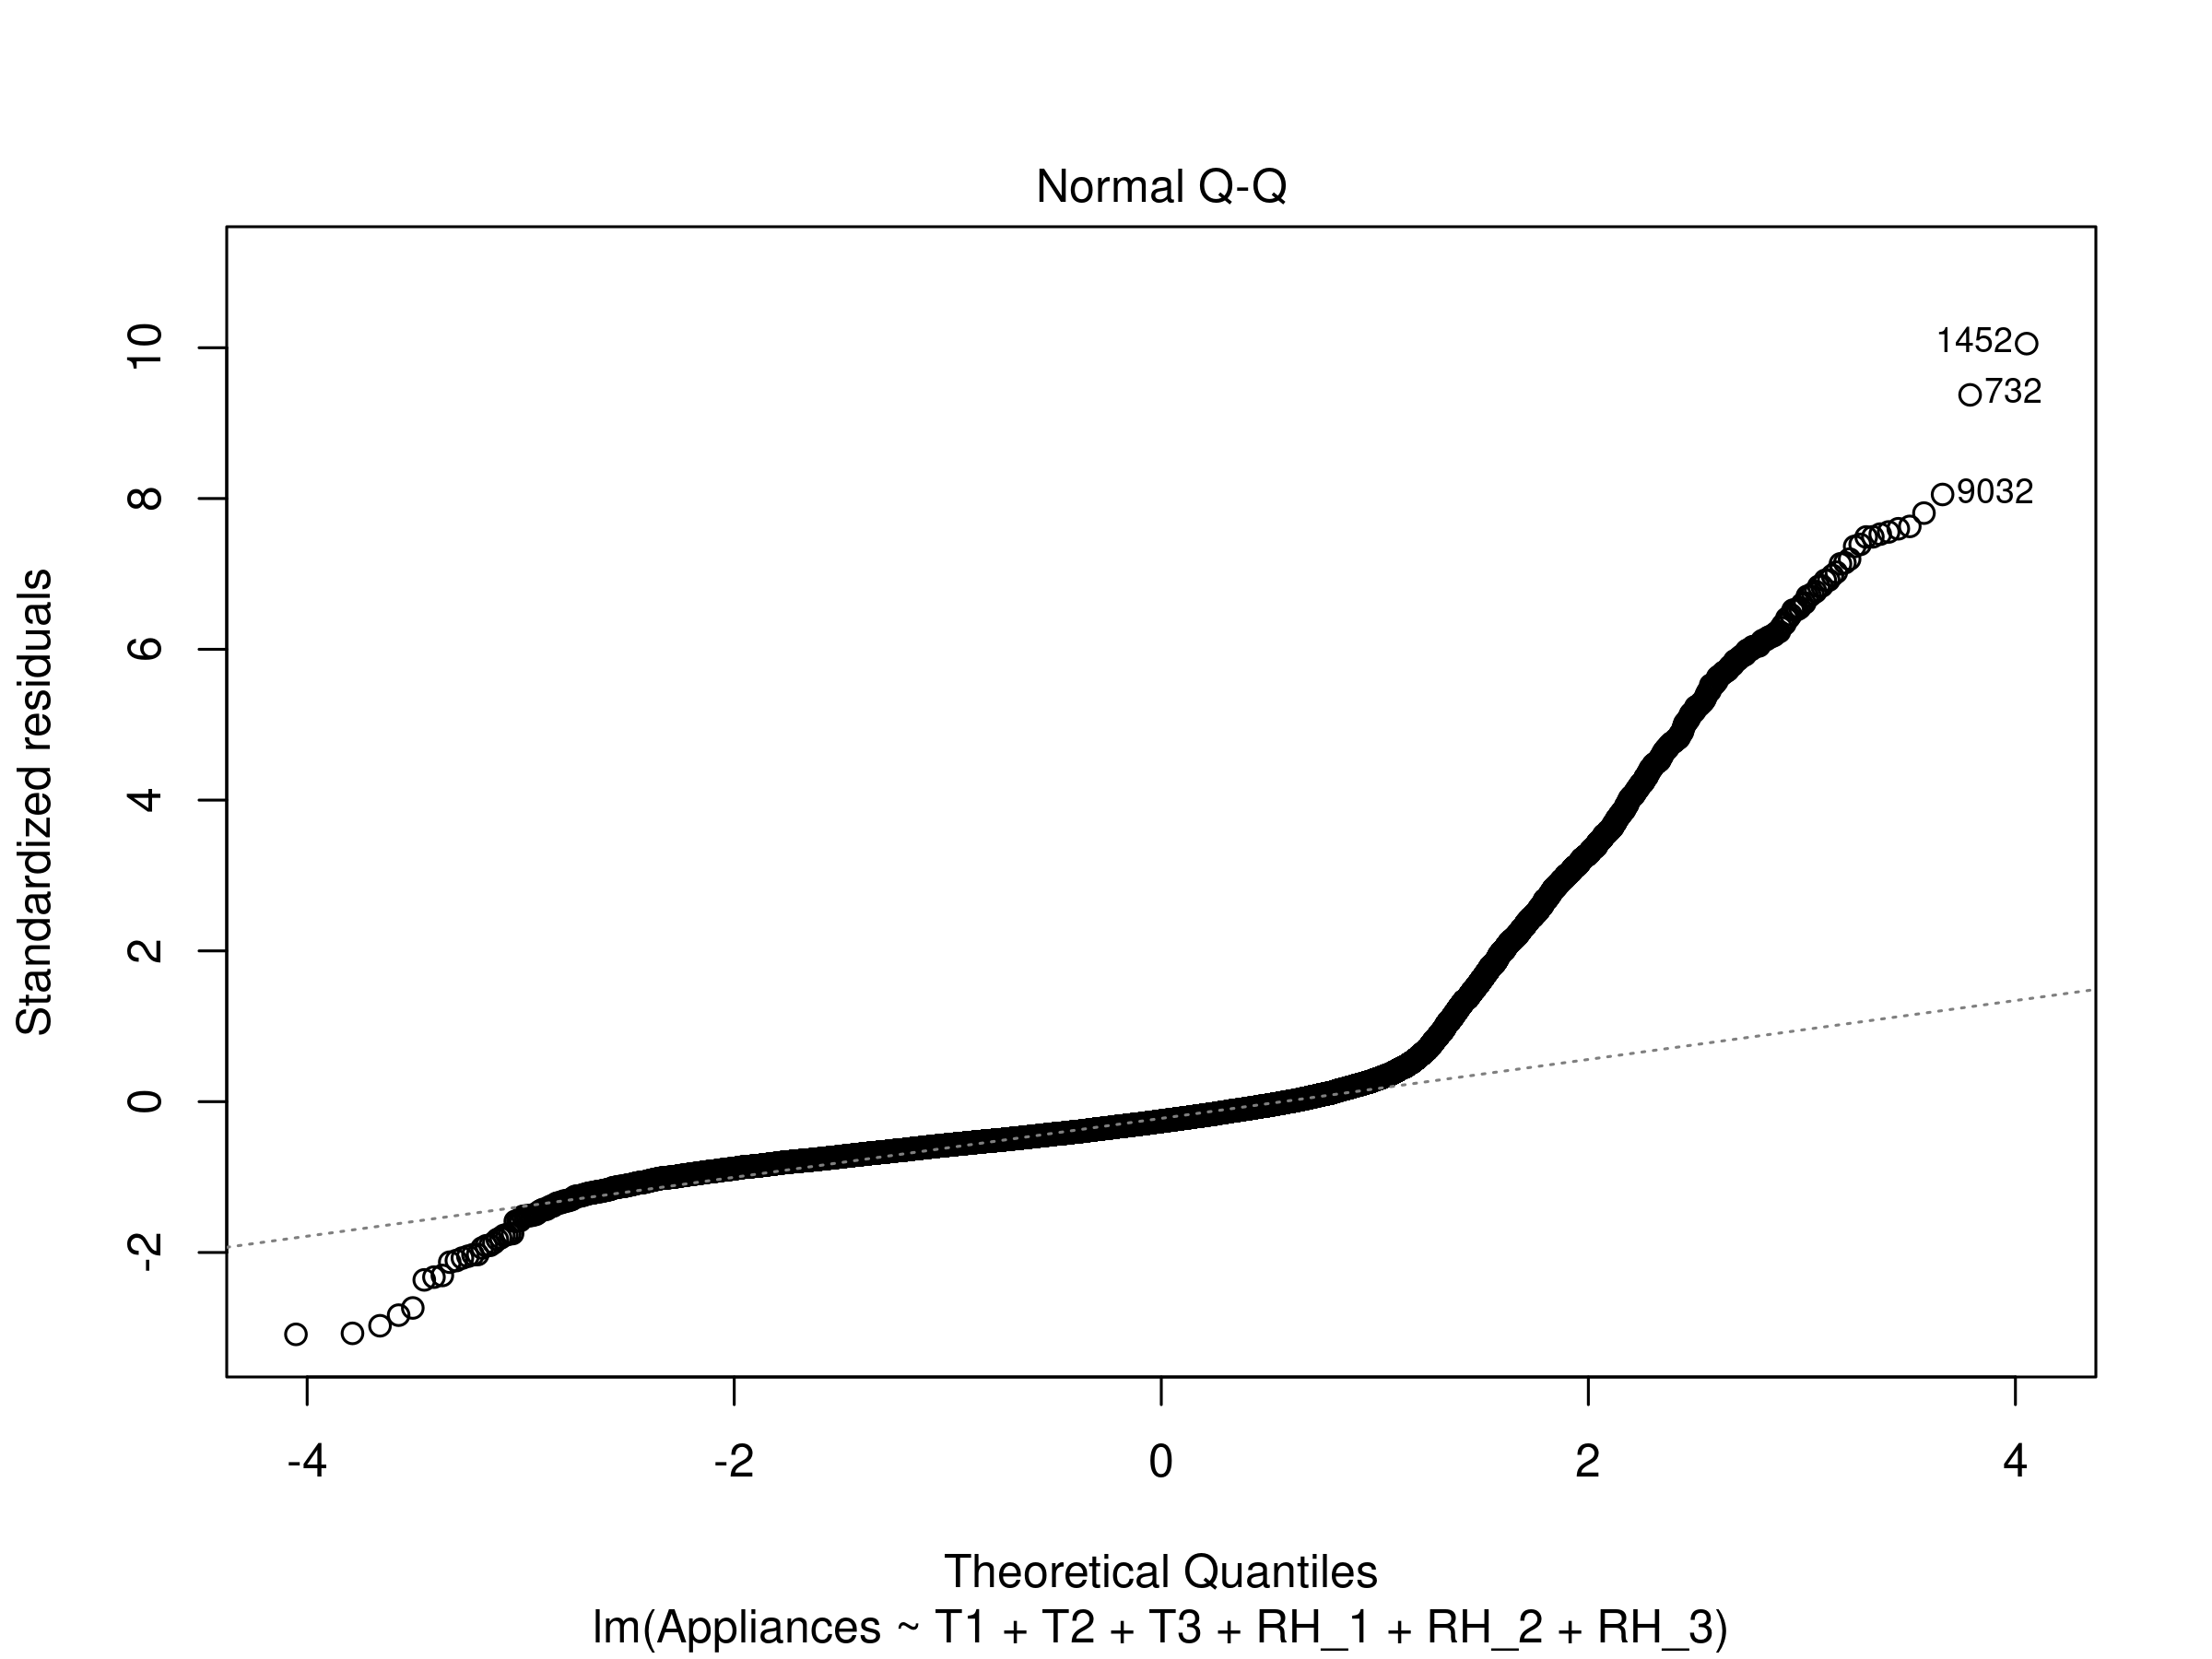

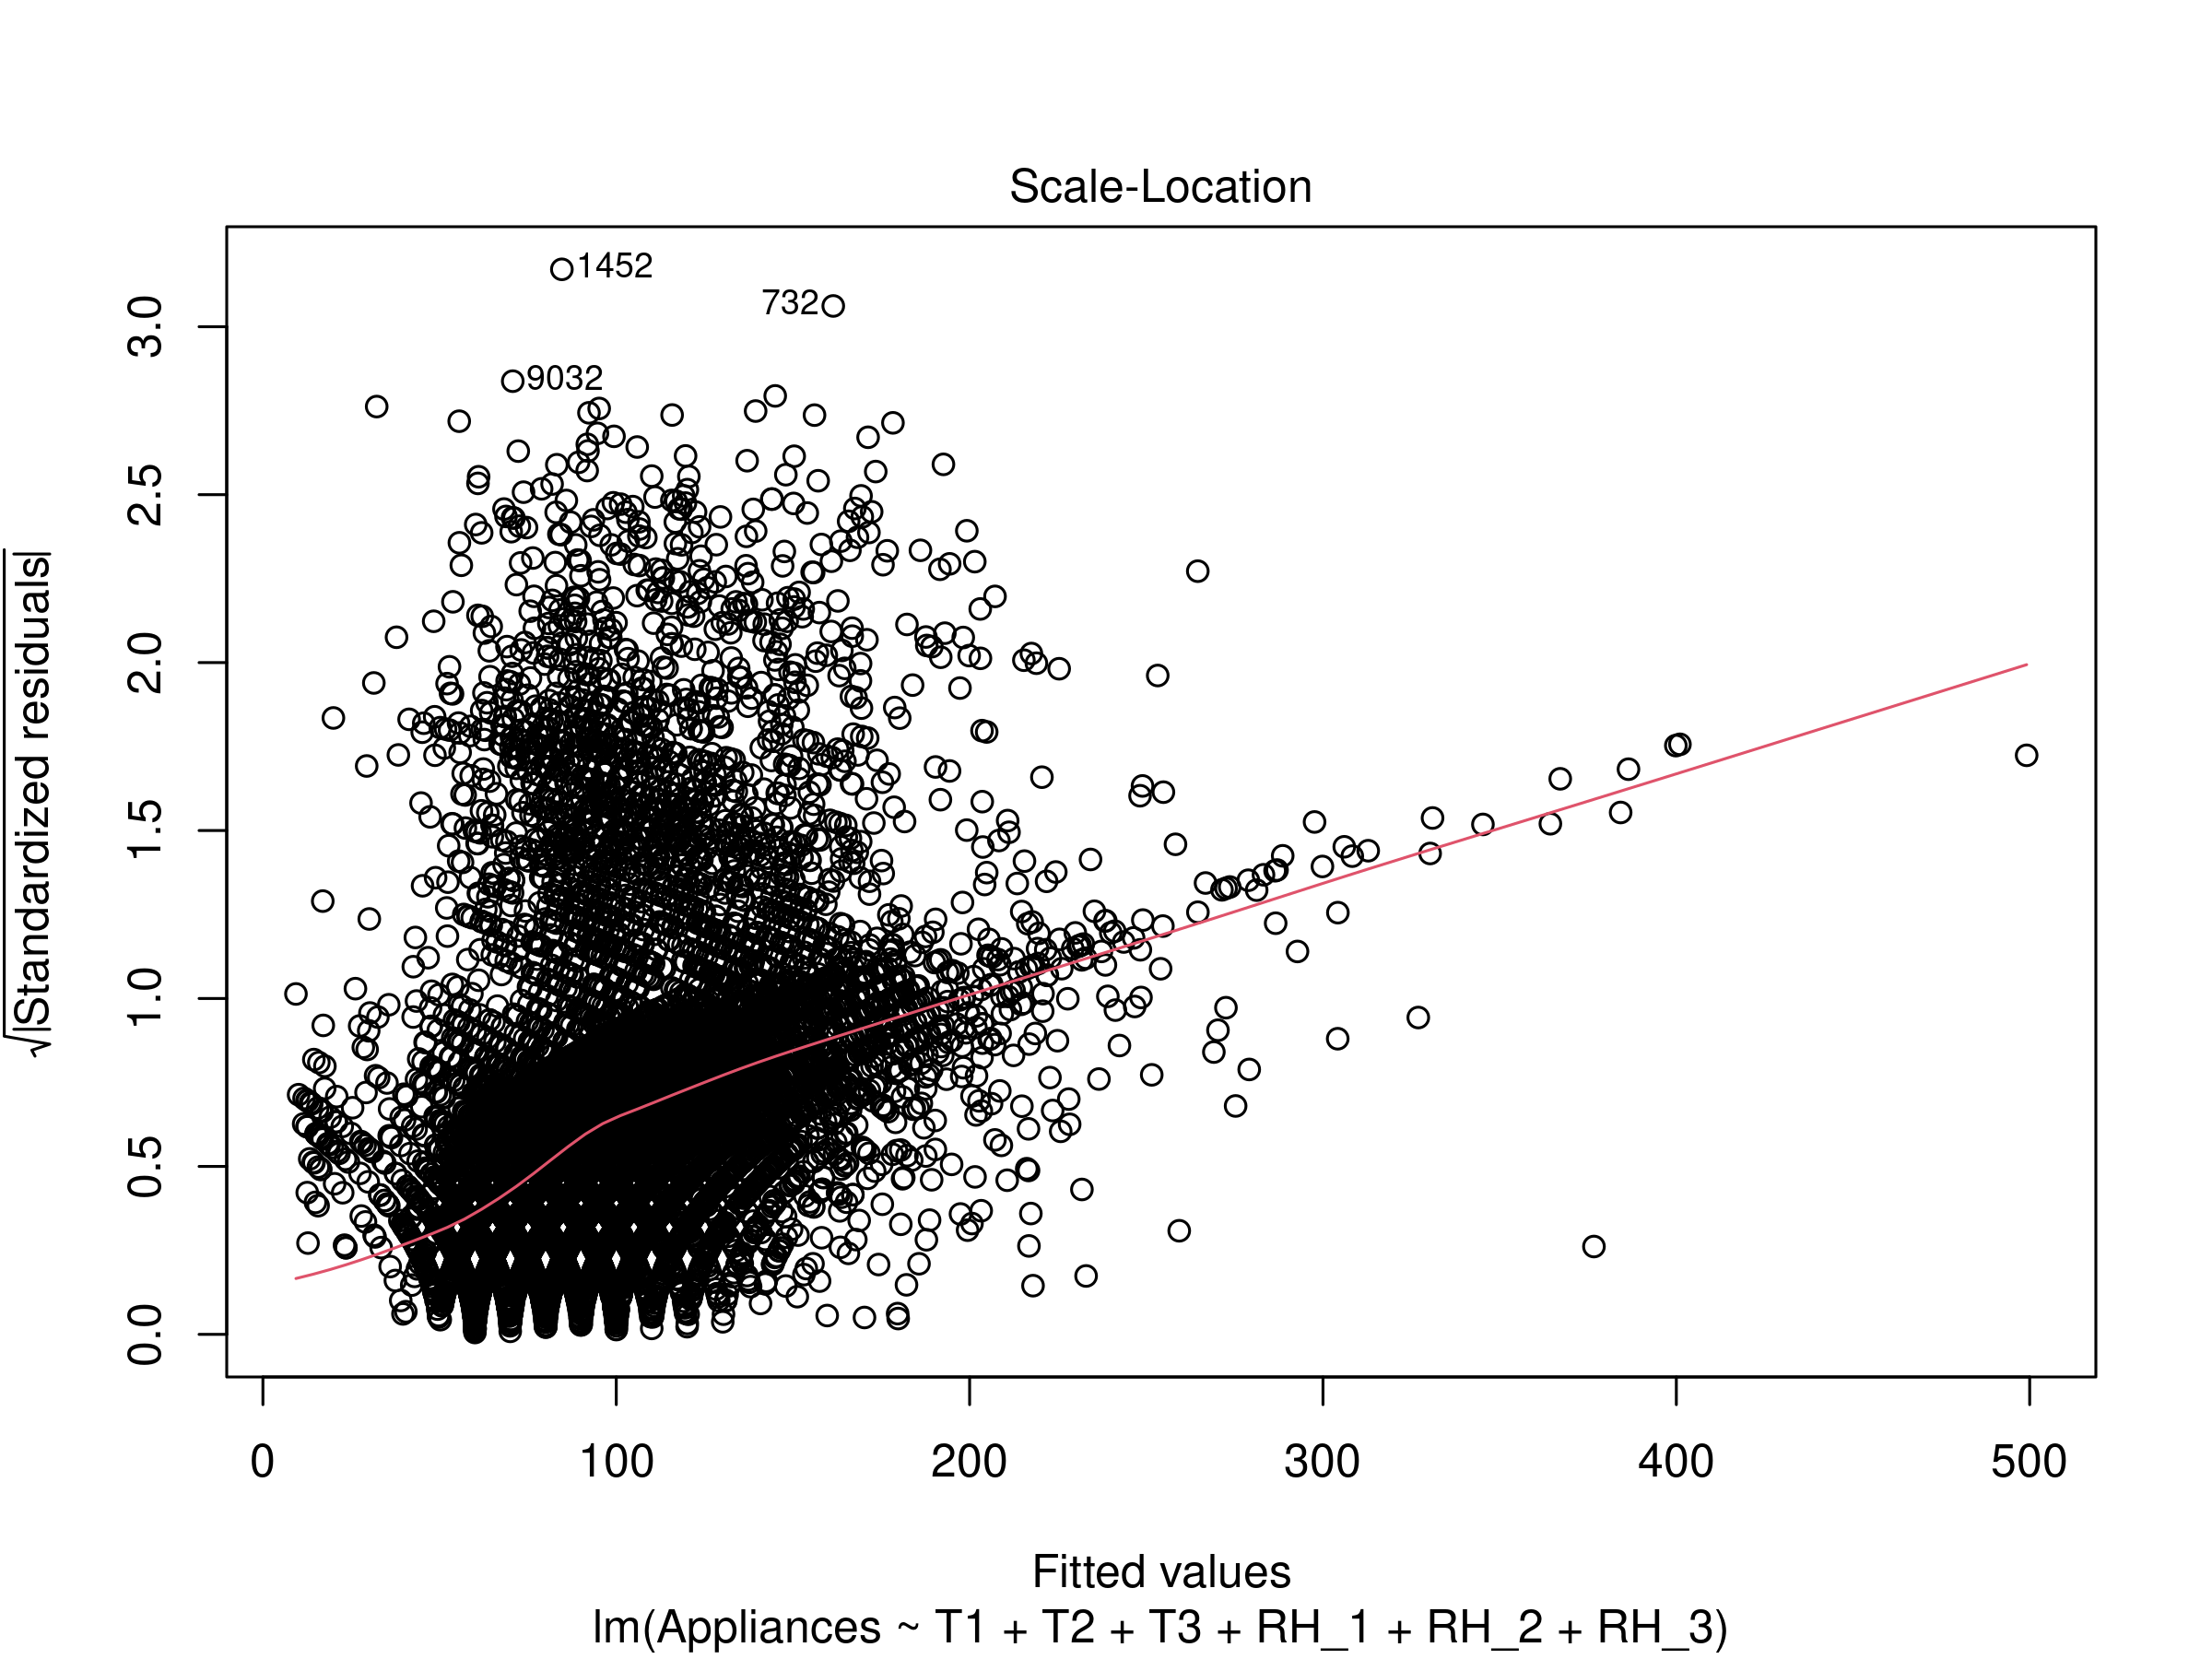

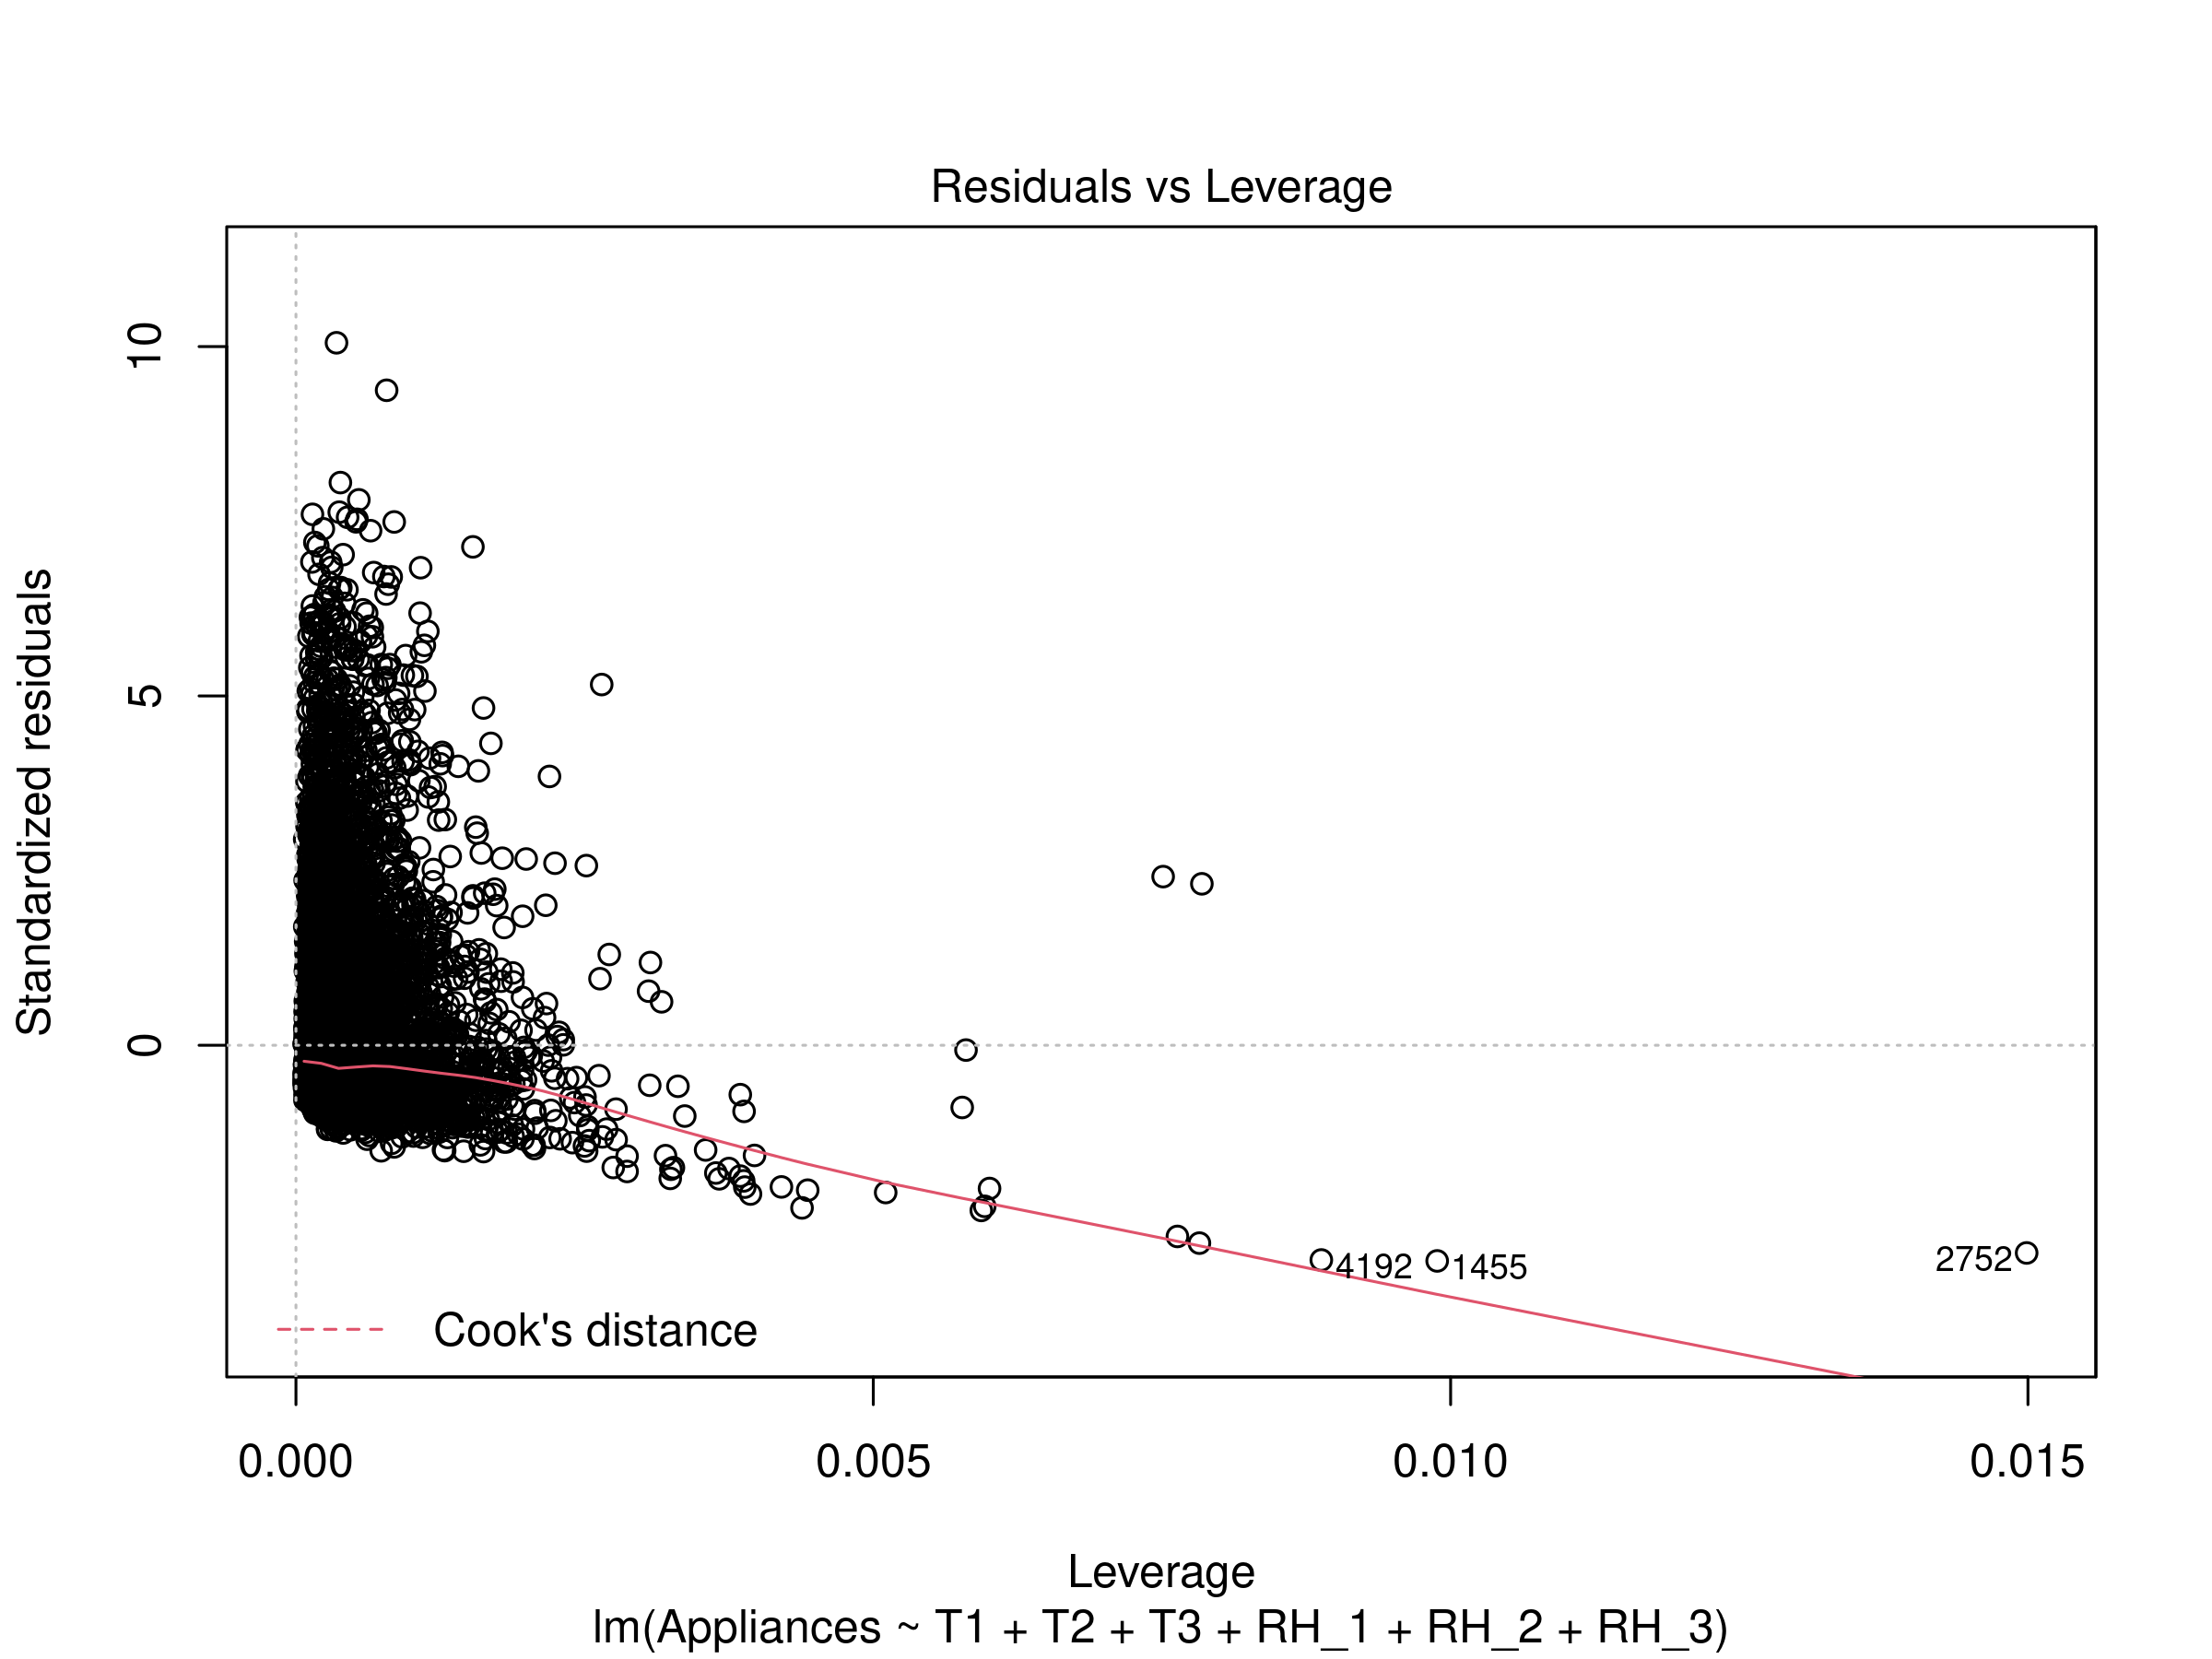

In [21]:
plot(lmod)

1번 그림
- 이상치가 존재하지만 등분산을 만족하는 것 같다.

2번 그림
- 정규성을 만족하지 않지만 각각 분포를 확인했을때 설명변수들은 정규분포 모양을 띄었다.

3번 그림
- 보류

4번 그림
- cook distance는 1을 넘어가면 문제가 생기는데, 그림을 보니 1을 넘지는 않는 것 같다.

In [22]:
library(car)

Loading required package: carData



In [23]:
ncvTest(lmod)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 3297.727, Df = 1, p = < 2.22e-16

- 유의수준 5%보다 작아 귀무가설인 등분산을 기각하게 되었다.
- 하지만 plot만 보았을때는 등분산에 크게 문제가 있어보이지 않았다.

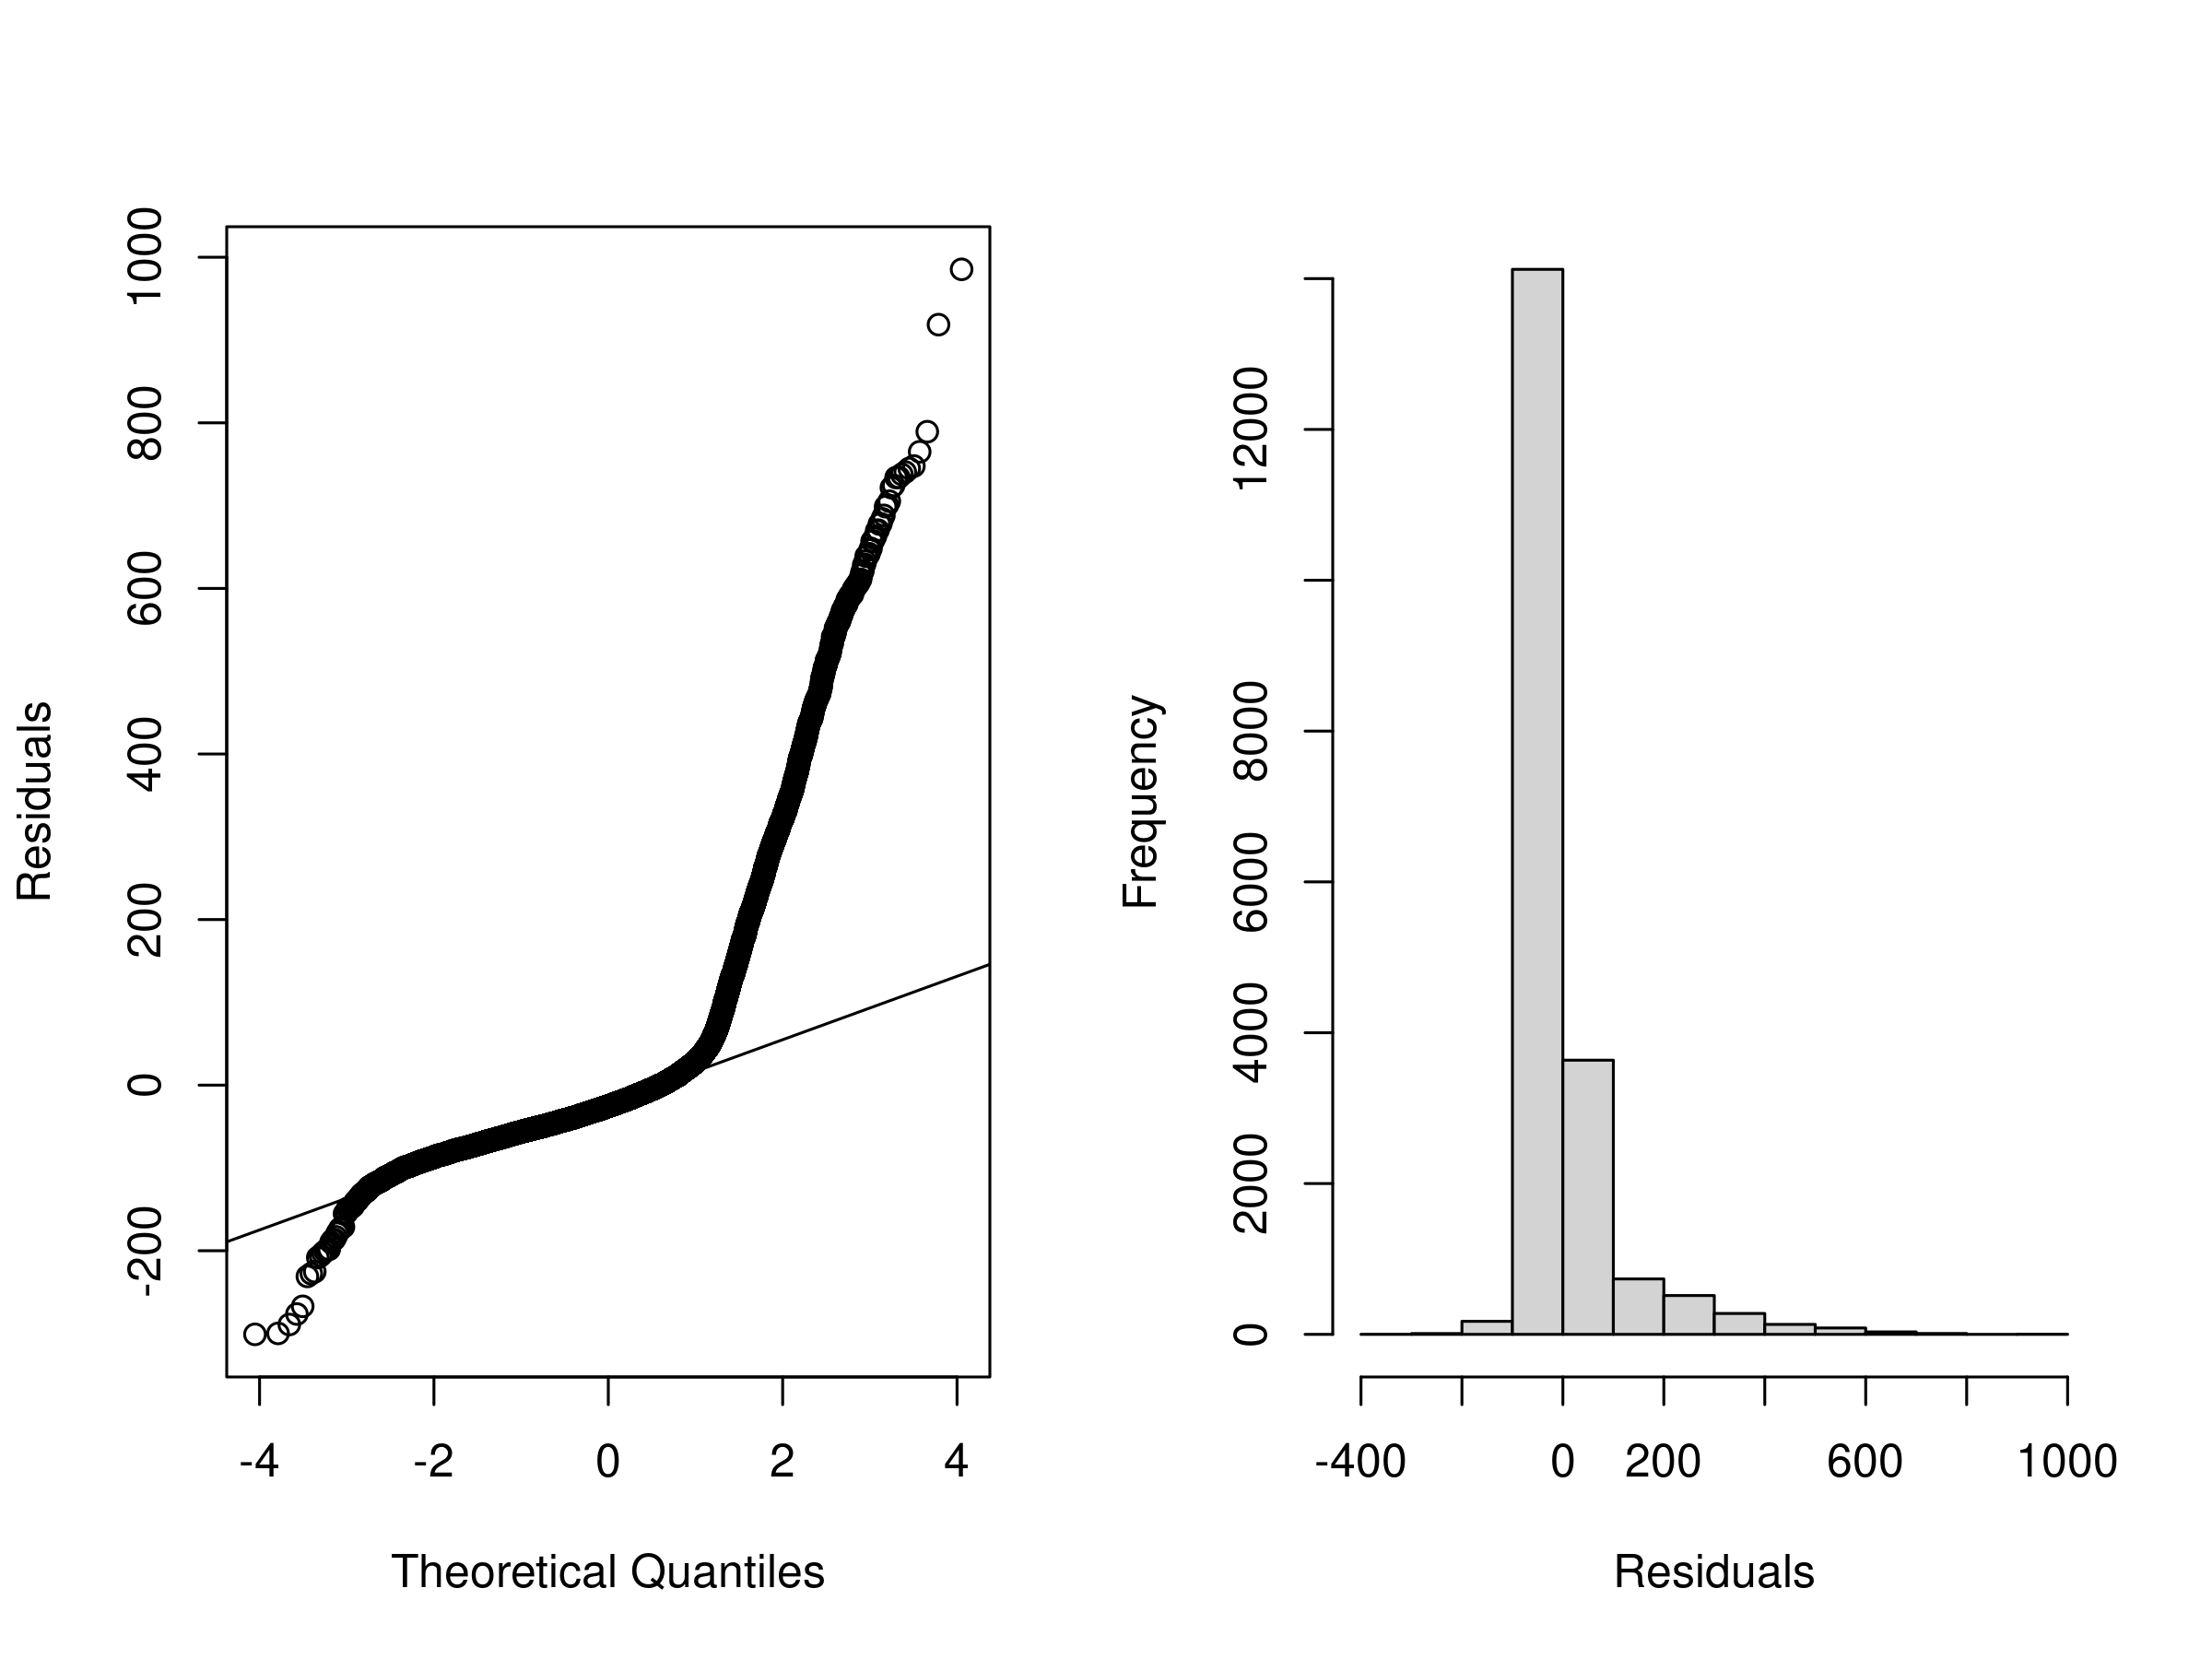

In [64]:
par(mfrow=c(1,2))
lmod <- lm(Appliances ~ T1+T2+T3+RH_1+RH_2+RH_3,energydata)
qqnorm(residuals(lmod),ylab="Residuals",main="")
qqline(residuals(lmod))
hist(residuals(lmod),xlab="Residuals",main="")

정규분포는 이상분포에 가깝지 않으며, 반응변수의 값들이 정규분포 모양을 띄고 있지 않다.

In [36]:
shapiro.test(residuals(lmod))

ERROR: Error in shapiro.test(residuals(lmod)): sample size must be between 3 and 5000


In [ ]:
plot(residuals(lmod) ~ year, na.omit(energydata), ylab="Residuals")
abline(h=0)

In [38]:
require(lmtest)

In [42]:
dwtest(Appliances ~ T1+T2+T3+RH_1+RH_2+RH_3,data=energydata)


	Durbin-Watson test

data:  Appliances ~ T1 + T2 + T3 + RH_1 + RH_2 + RH_3
DW = 0.5726, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


더빈왓슨 검정의 p값이 유의수준 5%보다 작아서 귀무가설을 기각 시키고 독립성이 성립 안 한다는 결론
- bootstrap을 시도해보자

In [44]:
head(energydata)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,⋯,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2016-01-11 17:00:00,60,30,19.89,47.59667,19.2,44.79000,19.79,44.73000,19.00000,⋯,17.03333,45.53,6.600000,733.5,92,7.000000,63.00000,5.3,13.27543,13.27543
2,2016-01-11 17:10:00,60,30,19.89,46.69333,19.2,44.72250,19.79,44.79000,19.00000,⋯,17.06667,45.56,6.483333,733.6,92,6.666667,59.16667,5.2,18.60619,18.60619
3,2016-01-11 17:20:00,50,30,19.89,46.30000,19.2,44.62667,19.79,44.93333,18.92667,⋯,17.00000,45.50,6.366667,733.7,92,6.333333,55.33333,5.1,28.64267,28.64267
4,2016-01-11 17:30:00,50,40,19.89,46.06667,19.2,44.59000,19.79,45.00000,18.89000,⋯,17.00000,45.40,6.250000,733.8,92,6.000000,51.50000,5.0,45.41039,45.41039
5,2016-01-11 17:40:00,60,40,19.89,46.33333,19.2,44.53000,19.79,45.00000,18.89000,⋯,17.00000,45.40,6.133333,733.9,92,5.666667,47.66667,4.9,10.08410,10.08410
6,2016-01-11 17:50:00,50,40,19.89,46.02667,19.2,44.50000,19.79,44.93333,18.89000,⋯,17.00000,45.29,6.016667,734.0,92,5.333333,43.83333,4.8,44.91948,44.91948


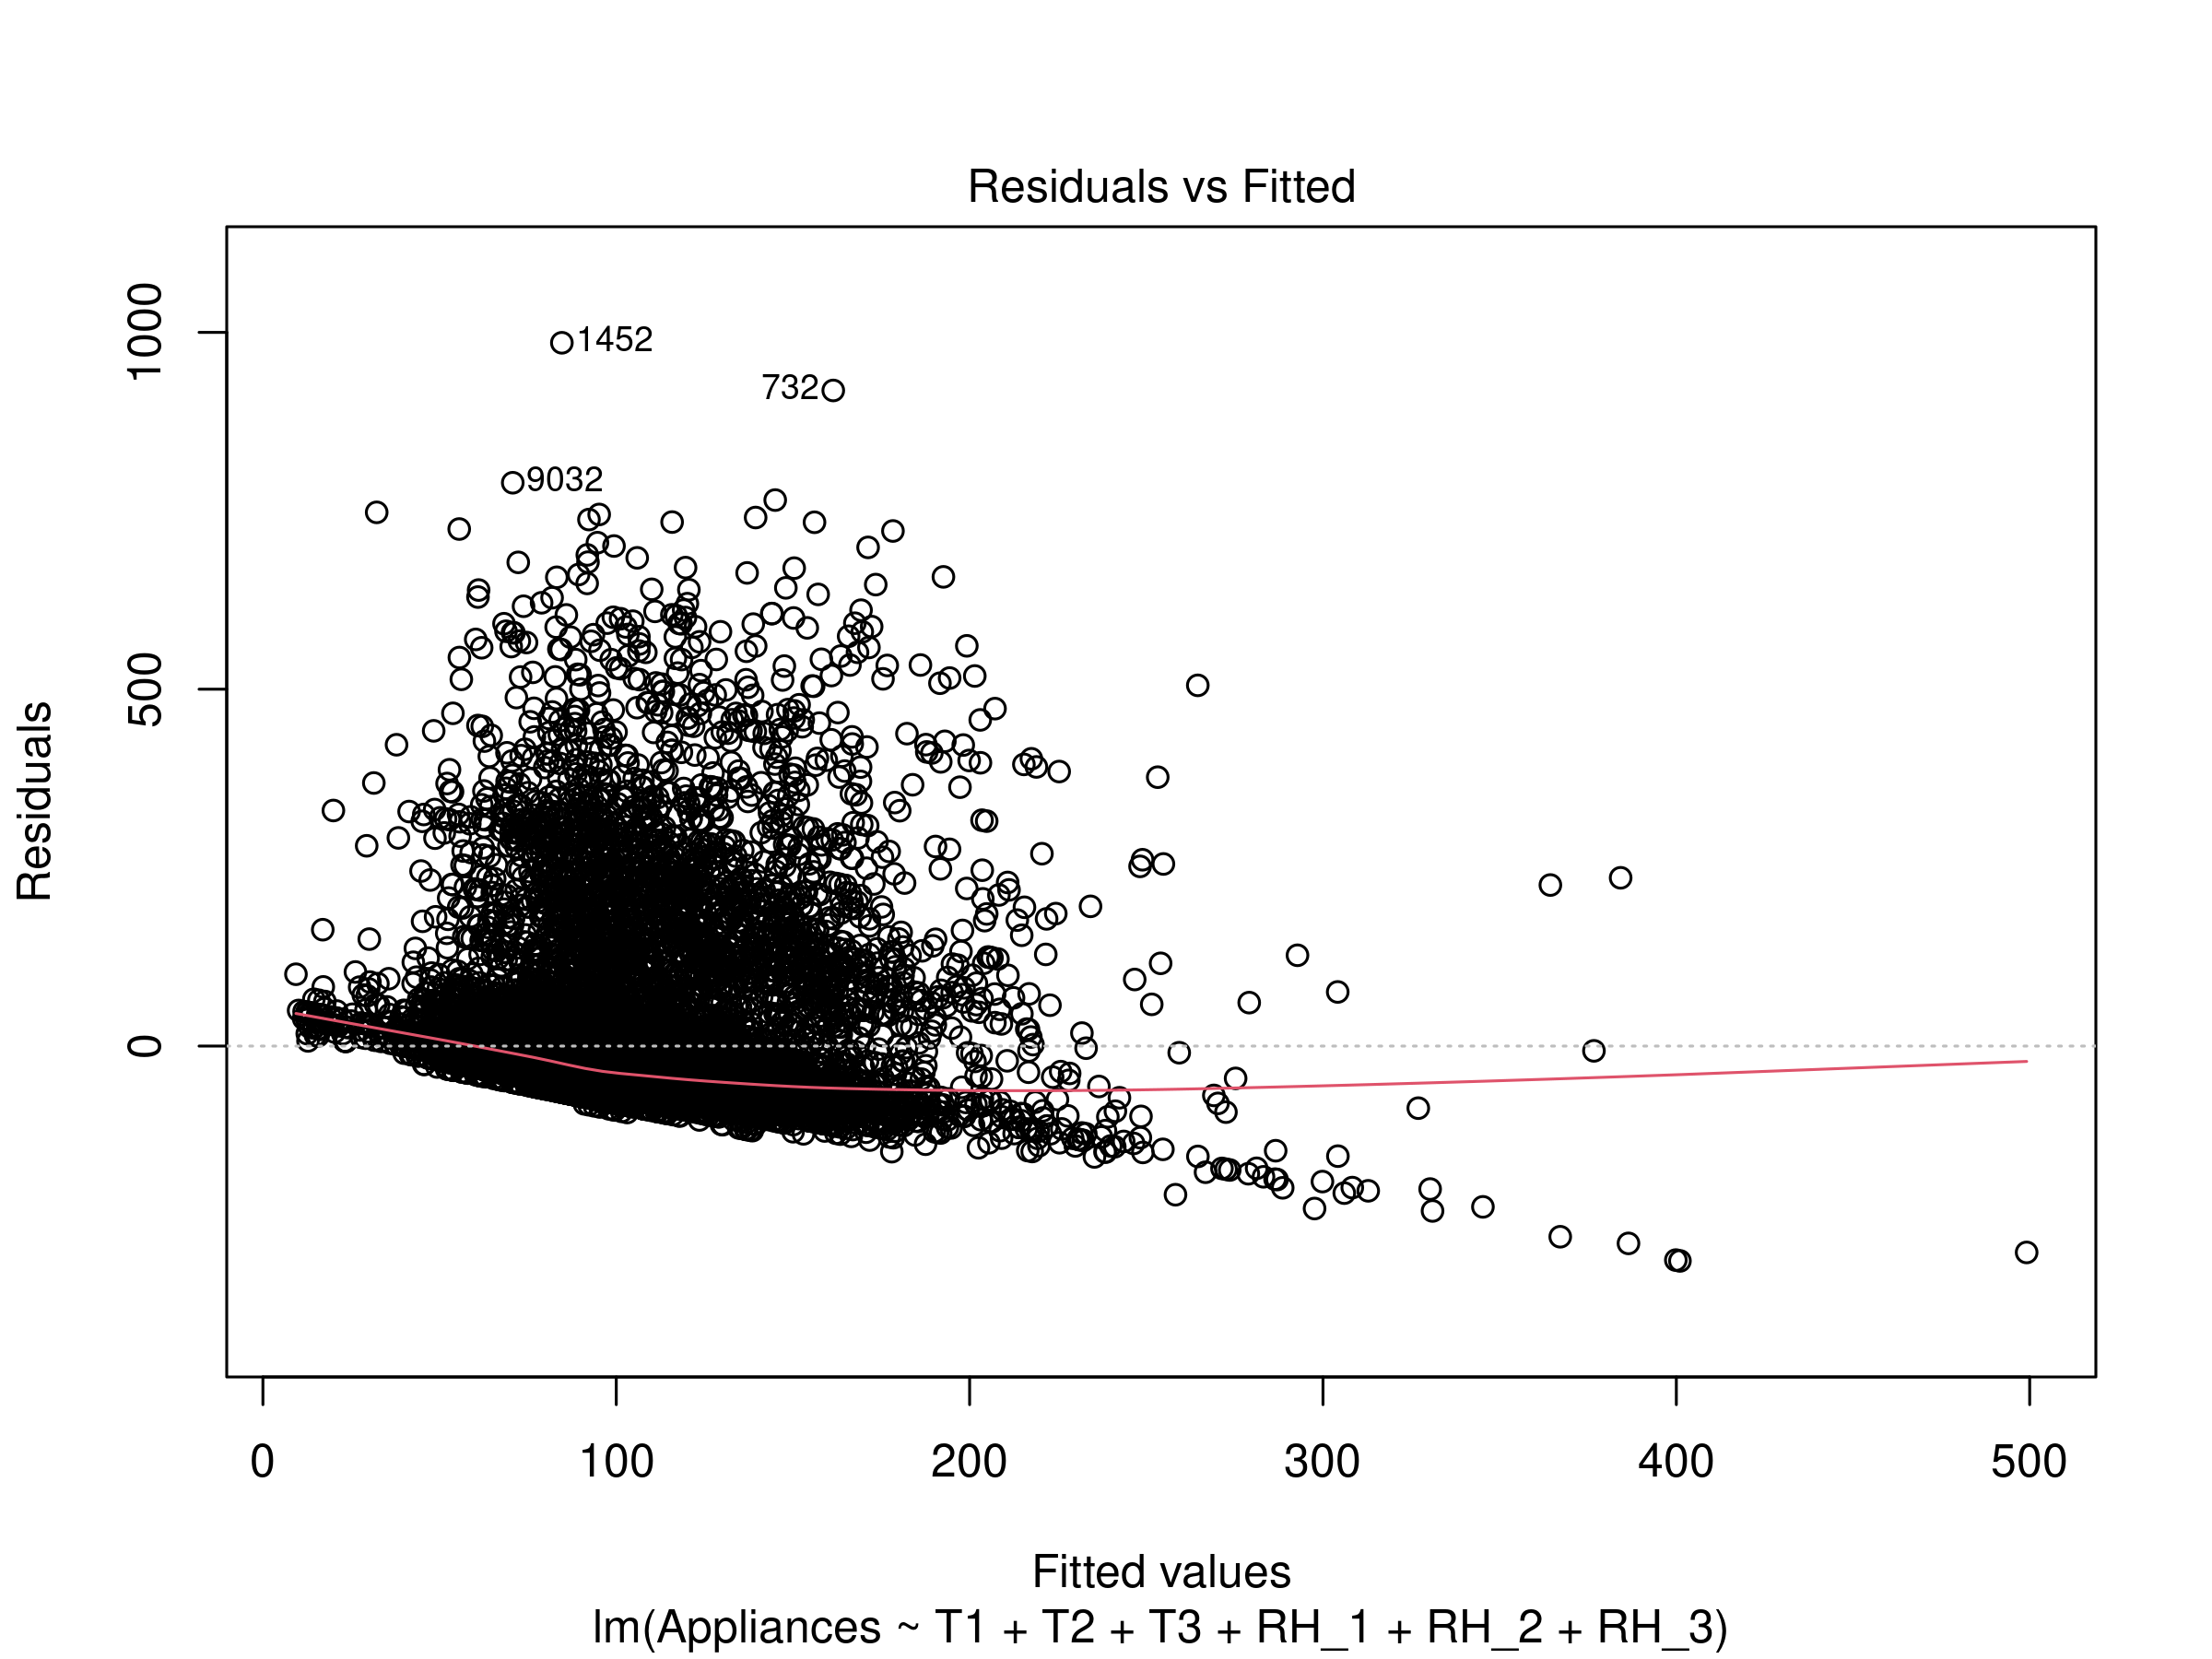

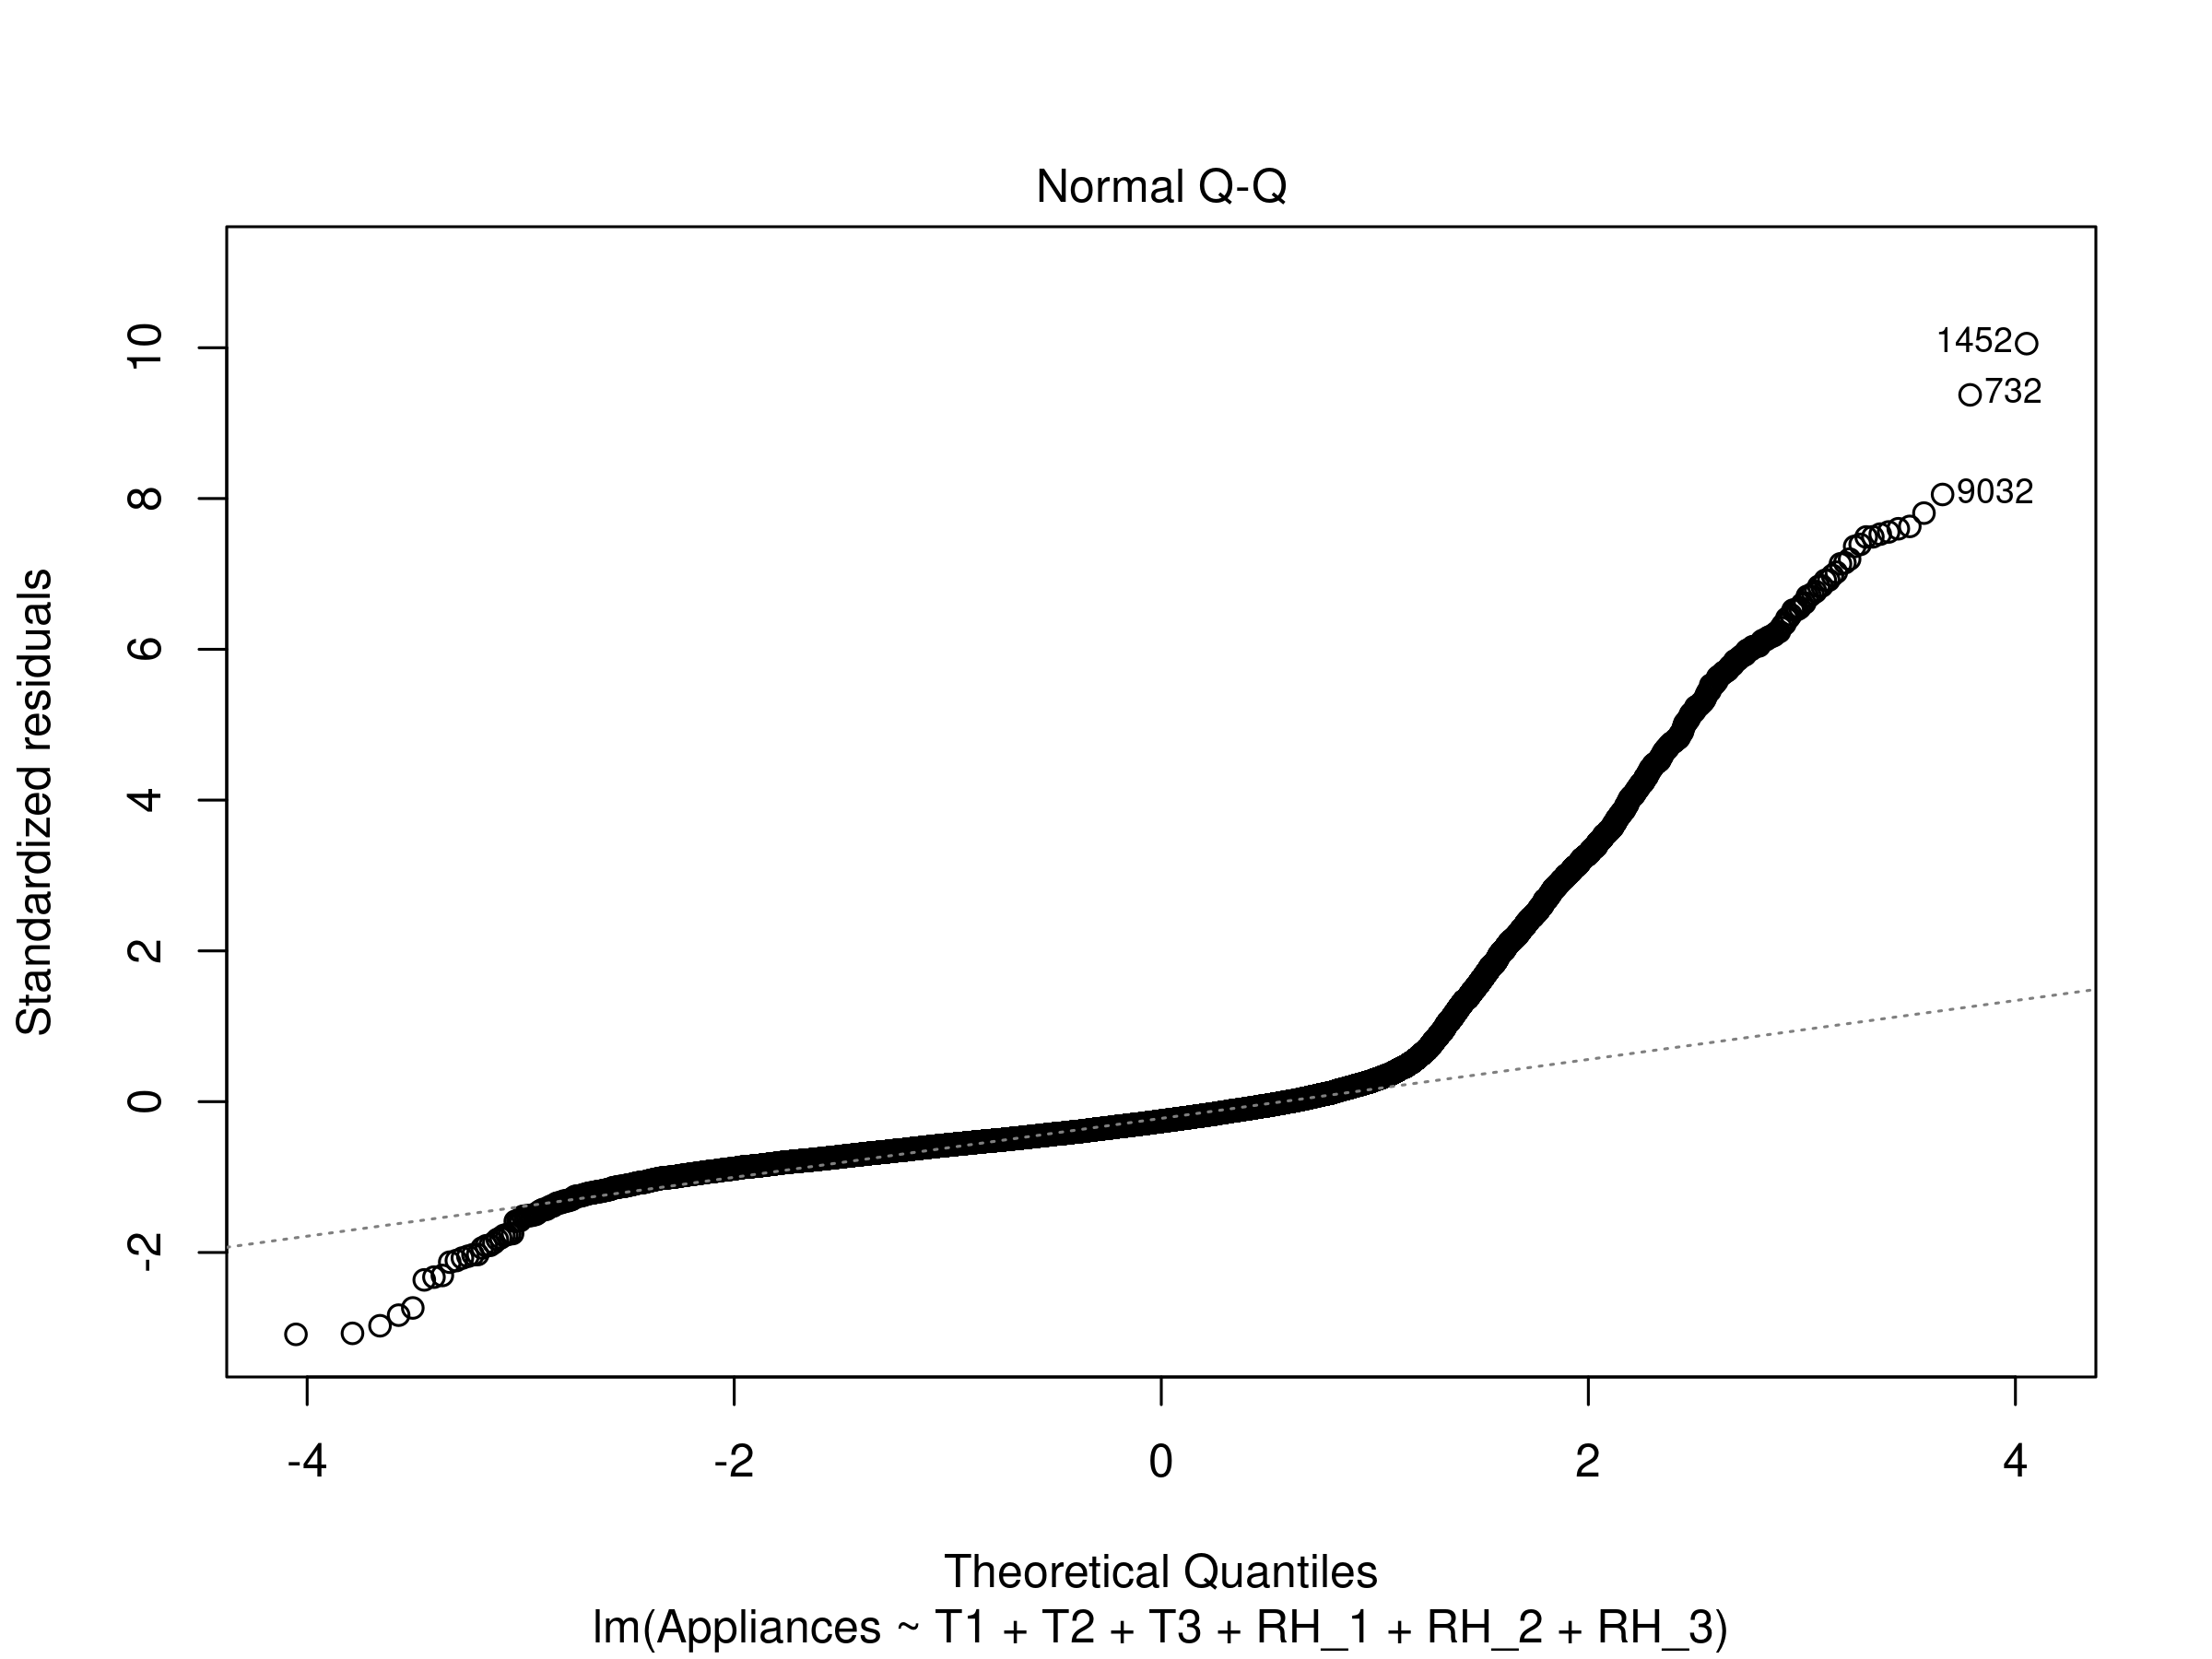

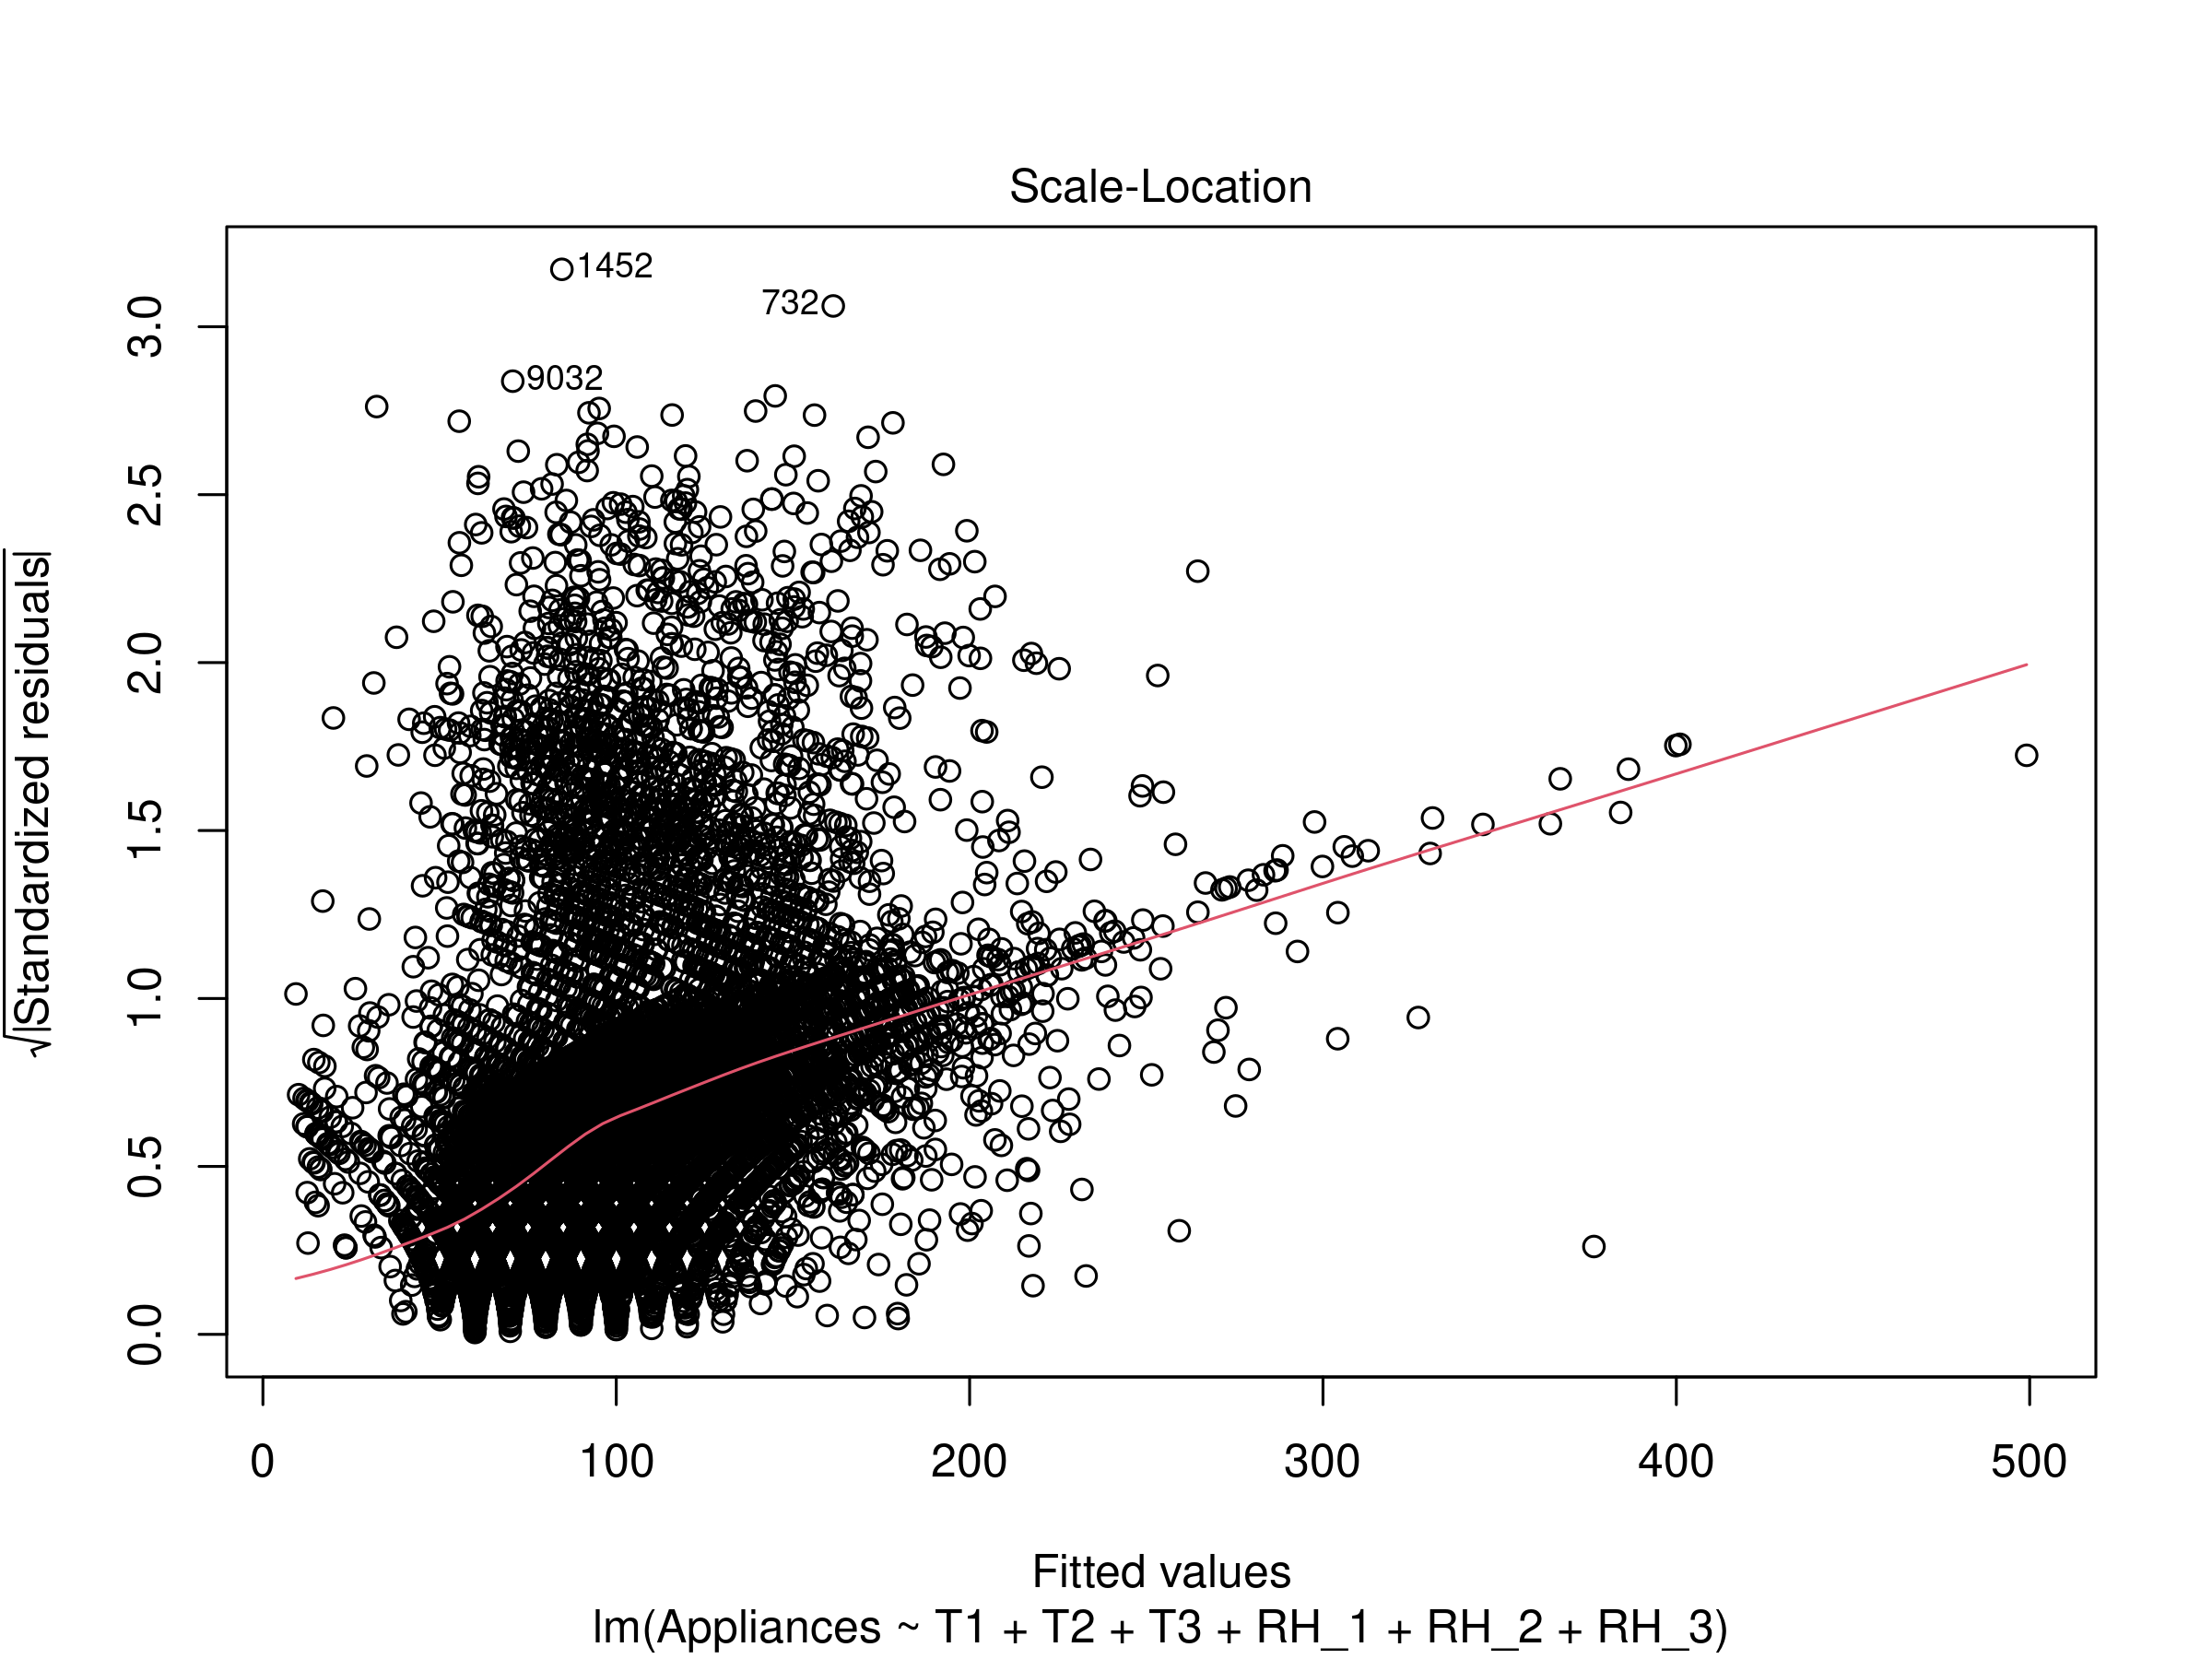

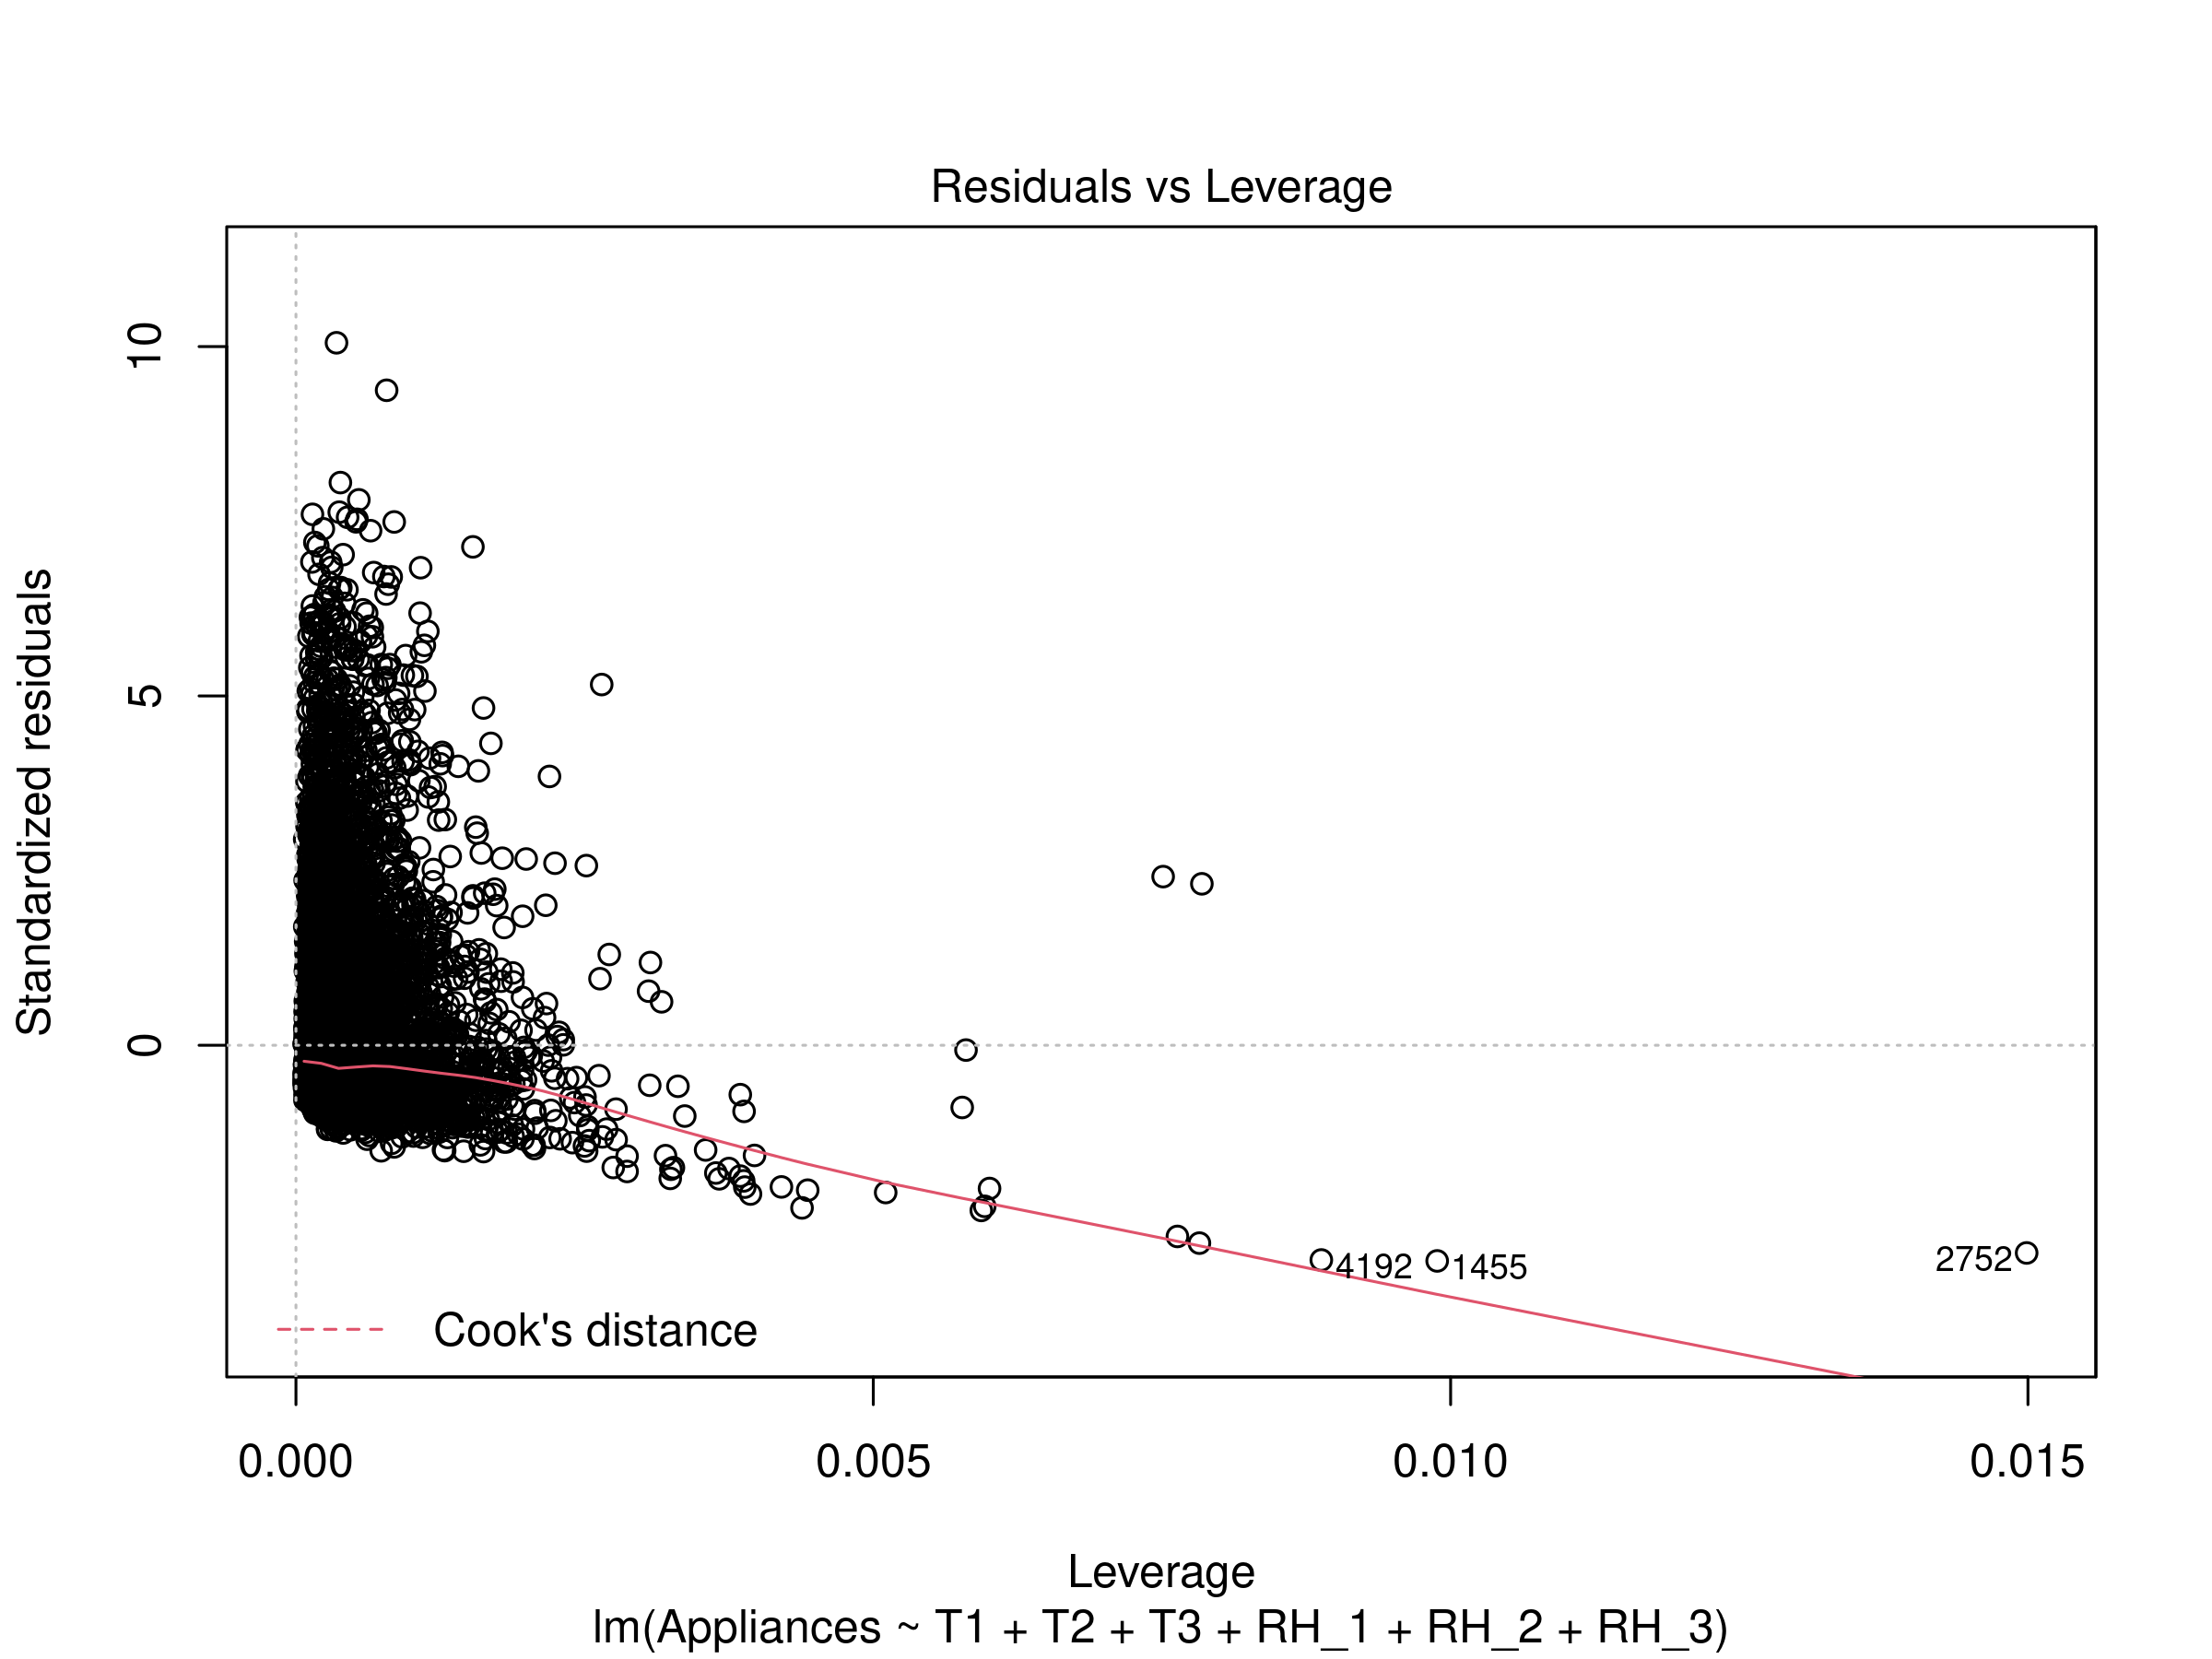

In [45]:
fit <- lm(Appliances ~ T1+T2+T3+RH_1+RH_2+RH_3, data = energydata)
plot(fit)

In [46]:
library(gvlma)

In [47]:
summary(gvlma(x=fit))


Call:
lm(formula = Appliances ~ T1 + T2 + T3 + RH_1 + RH_2 + RH_3, 
    data = energydata)

Residuals:
    Min      1Q  Median      3Q     Max 
-301.02  -47.50  -25.39    4.16  985.39 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 144.6635    14.2832  10.128  < 2e-16 ***
T1            8.5077     1.4755   5.766 8.24e-09 ***
T2          -26.3433     1.2577 -20.946  < 2e-16 ***
T3           14.5414     0.8813  16.500  < 2e-16 ***
RH_1         21.5324     0.6616  32.548  < 2e-16 ***
RH_2        -21.2781     0.6188 -34.384  < 2e-16 ***
RH_3         -0.6686     0.4589  -1.457    0.145    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 98.02 on 19728 degrees of freedom
Multiple R-squared:  0.08613,	Adjusted R-squared:  0.08586 
F-statistic: 309.9 on 6 and 19728 DF,  p-value: < 2.2e-16


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:


p-value를 보아 모두 H_0를 기각하여 모든 값에 대해 모든 변수들이 영향을 끼친다는 결론이 나온다.

그림만 보면 등분산성을 만족해 보였지만, 검정결과는 만족하지 않았다.

반응변수의 정규분포 가정을 만족하지 않았다.

In [50]:
shapiro.test(fit$residuals)

ERROR: Error in shapiro.test(fit$residuals): sample size must be between 3 and 5000


In [53]:
library(car)

In [54]:
ncvTest(fit)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 3297.727, Df = 1, p = < 2.22e-16

In [55]:
B=2000
set.seed(1)
n = length(energydata$Appliances)
Bm1=c()

for (i in 1:B)
  {
  hi=sample(1:n,replace=T)
  hx=energydata$facebook[hi]
  hy=energydata$Appliances[hi]
  Bm1[i]=lm(hy~hx)$coefficients[2]
}

hb=fit$coefficients[2]

# Bootstrap C.I. (normal interval)
c(hb-qnorm(0.975)*sd(Bm1),hb+qnorm(0.975)*sd(Bm1))

ERROR: Error in eval(expr, envir, enclos): object 'marketing' not found


---

refer

Source:

Luis Candanedo, luismiguel.candanedoibarra '@' umons.ac.be, University of Mons (UMONS).


Data Set Information:

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

For more information about the house, data collection, R scripts and figures, please refer to the paper and to the following github repository:

[website]('https://github.com/LuisM78/Appliances-energy-prediction-data')

Attribute Information:

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.